In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
base_dir = '/content/drive/MyDrive/breast_cancer_data'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'test')

#Directory with our training pictures
train_begin_dir=os.path.join(train_dir,'0')
train_maligant_dir=os.path.join(train_dir,'1')

#Directory with our validation pictures
validation_begin_dir=os.path.join(validation_dir,'0')
validation_maligant_dir=os.path.join(validation_dir,'1')

In [ ]:
train_begin_fnames=os.listdir(train_begin_dir)
train_maligant_fnames=os.listdir(train_maligant_dir)
print(train_begin_fnames[:5])
print(train_maligant_fnames[:5])

['8914_idx5_x1701_y2901_class0.png', '8914_idx5_x1701_y101_class0.png', '8914_idx5_x1751_y1801_class0.png', '8914_idx5_x1801_y2251_class0.png', '8914_idx5_x1751_y1851_class0.png']
['9035_idx5_x351_y601_class1.png', '9035_idx5_x451_y551_class1.png', '9035_idx5_x351_y551_class1.png', '9035_idx5_x501_y1001_class1.png', '9035_idx5_x451_y951_class1.png']


In [ ]:
print(len(os.listdir(train_begin_dir)))
print(len(os.listdir(train_maligant_dir)))
print(len(os.listdir(validation_begin_dir)))
print(len(os.listdir(validation_maligant_dir)))

5812
5812
1162
1162


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows=5
ncols=5
pic_index=0

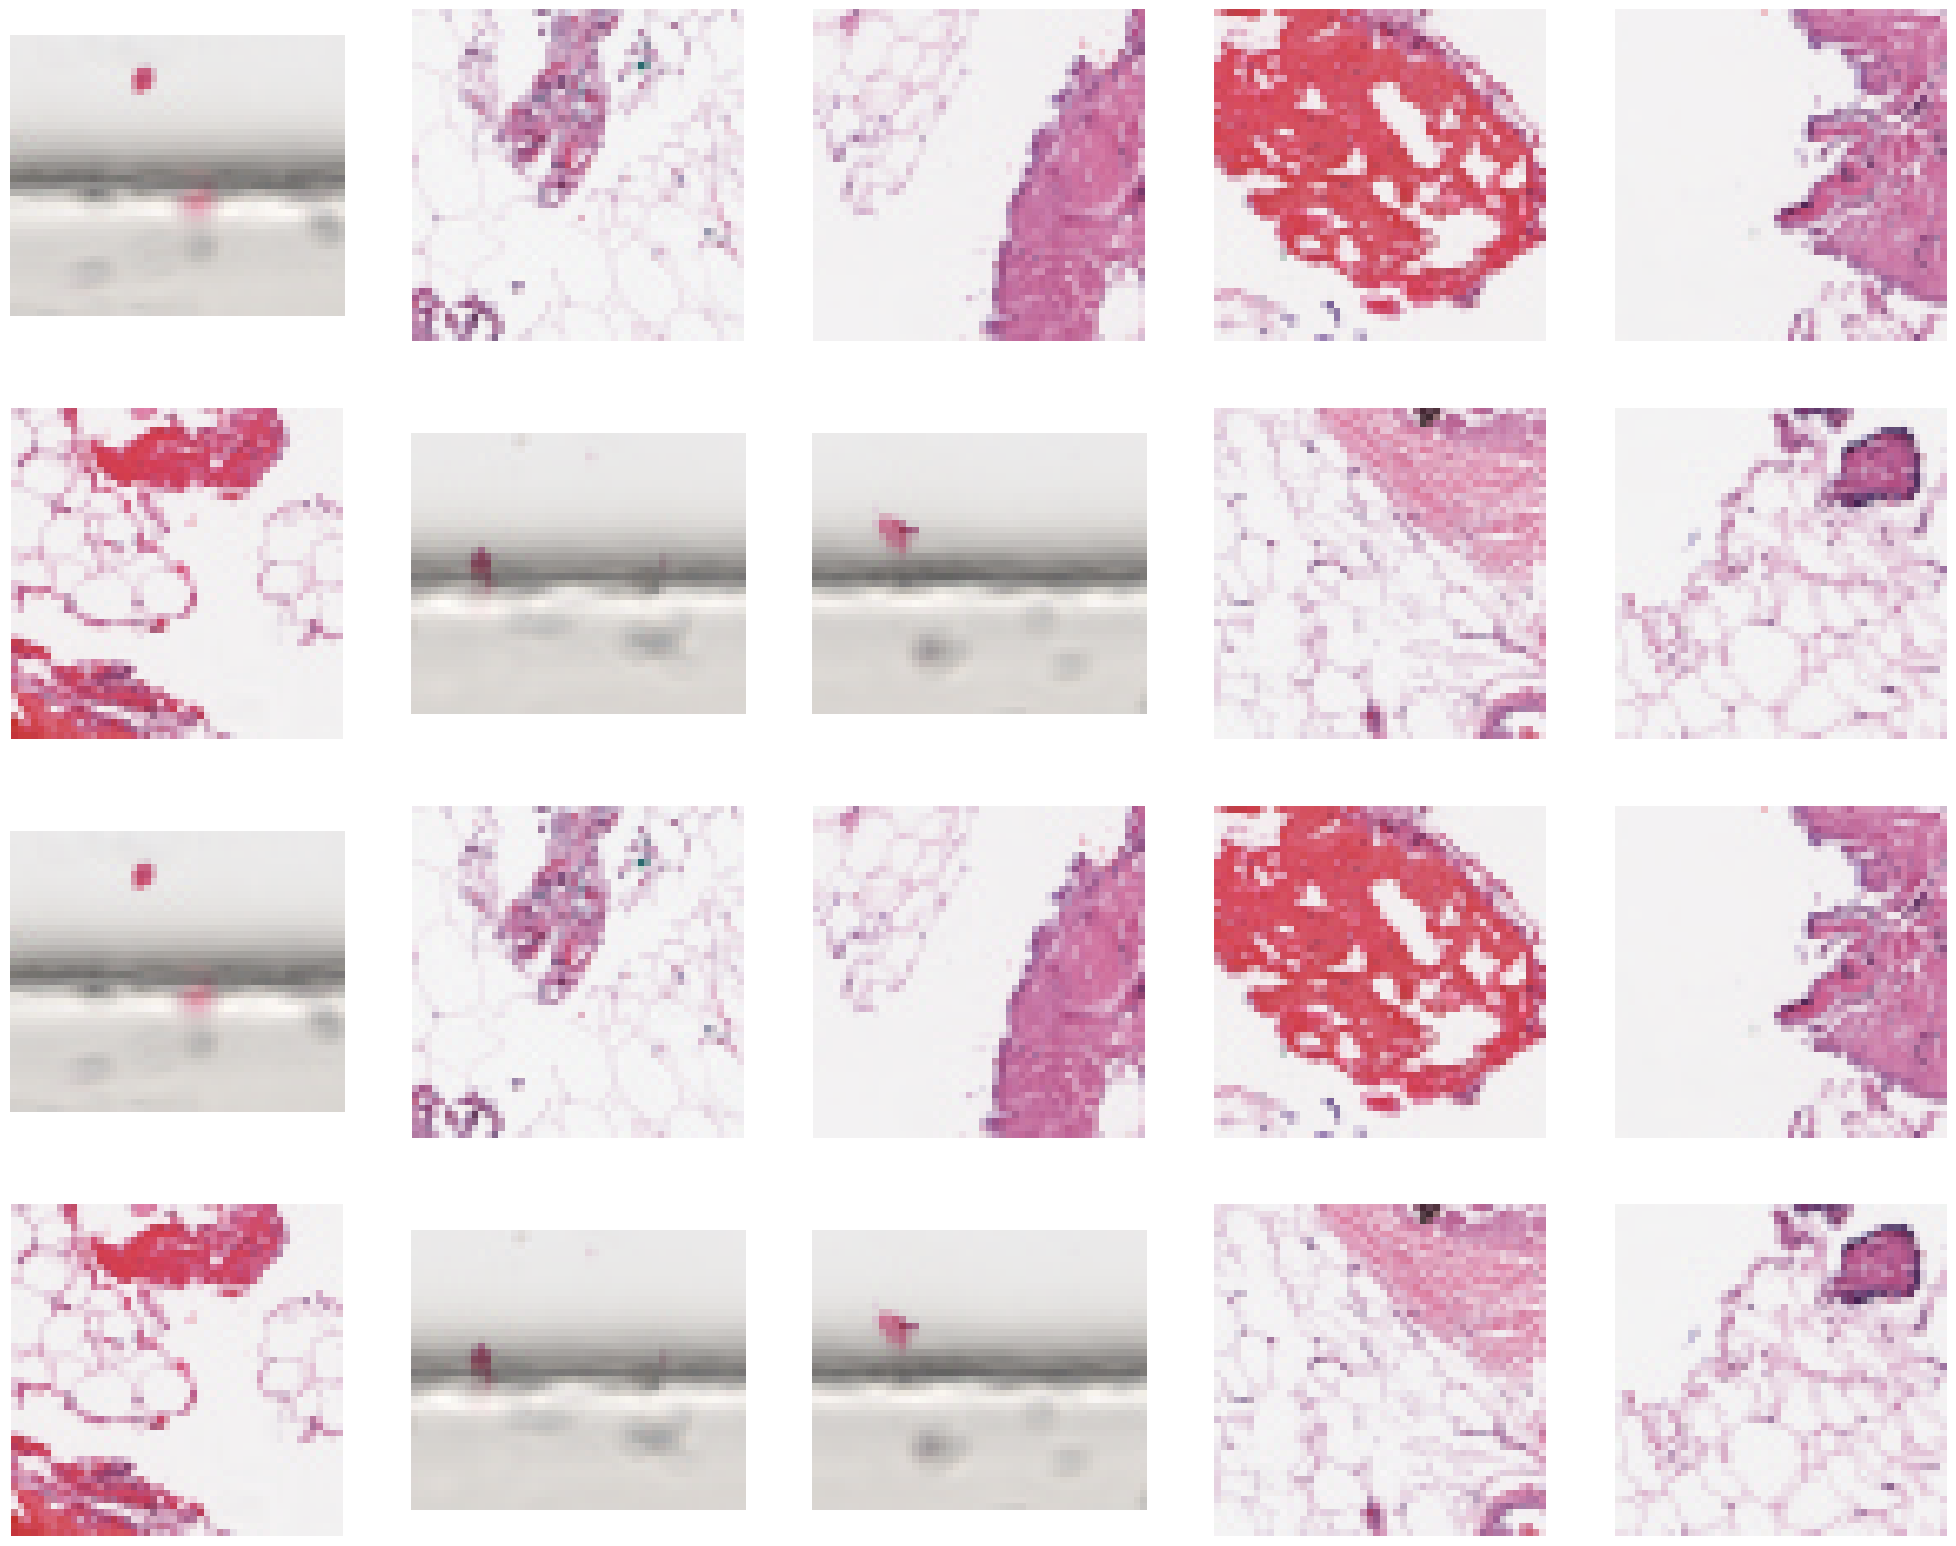

In [ ]:
fig=plt.gcf()
fig.set_size_inches(ncols*5,nrows*5)
pic_index+=10
next_begin_pix=[os.path.join(train_begin_dir,fname) for fname in train_begin_fnames[pic_index-10:pic_index]]
next_maligant_pix=[os.path.join(train_maligant_dir,fname) for fname in train_maligant_fnames[pic_index-10:pic_index]]
for i,img_path in enumerate(next_begin_pix+next_begin_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(64,64))
validation_generator=train_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode='binary',target_size=(64,64))

Found 11624 images belonging to 2 classes.
Found 2324 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives,BinaryAccuracy,Precision,Recall,AUC
from tensorflow.keras.metrics import SpecificityAtSensitivity
METRICS=[TruePositives(name='tp'),
         FalsePositives(name='fp'),
         TrueNegatives(name='tn'),
         FalseNegatives(name='fn'),
         BinaryAccuracy(name='accuracy'),
         Precision(name='precision'),
         Recall(name='recall'),
         AUC(name='auc'),
         SpecificityAtSensitivity(sensitivity=0.8,name='sensitivity'),]

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.layers import MaxPooling2D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import MaxPooling2D

model=tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 3),
                          kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512,activation='relu',
                          kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0,1),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.92, beta_2=0.999),
              loss='binary_crossentropy',
              metrics=METRICS)
early_stop=EarlyStopping(monitor='val_acc',patience=5,restore_best_weights=True)
history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=50,epochs=100,validation_steps=12,callbacks=[early_stop])

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 1.0627 - tp: 171.0000 - fp: 155.0000 - tn: 364.0000 - fn: 310.0000 - accuracy: 0.5350 - precision: 0.5245 - recall: 0.3555 - auc: 0.5706 - sensitivity: 0.3006

50/50 [==============================] - 304s 6s/step - loss: 1.0627 - tp: 171.0000 - fp: 155.0000 - tn: 364.0000 - fn: 310.0000 - accuracy: 0.5350 - precision: 0.5245 - recall: 0.3555 - auc: 0.5706 - sensitivity: 0.3006 - val_loss: 0.8573 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 112.0000 - val_fn: 124.0000 - val_accuracy: 0.4750 - val_precision: 0.5000 - val_recall: 0.0159 - val_auc: 0.8344 - val_sensitivity: 0.7544
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.7103 - tp: 344.0000 - fp: 122.0000 - tn: 386.0000 - fn: 148.0000 - accuracy: 0.7300 - precision: 0.7382 - recall: 0.6992 - auc: 0.7763 - sensitivity: 0.6496

50/50 [==============================] - 275s 6s/step - loss: 0.7103 - tp: 344.0000 - fp: 122.0000 - tn: 386.0000 - fn: 148.0000 - accuracy: 0.7300 - precision: 0.7382 - recall: 0.6992 - auc: 0.7763 - sensitivity: 0.6496 - val_loss: 0.8713 - val_tp: 17.0000 - val_fp: 0.0000e+00 - val_tn: 112.0000 - val_fn: 111.0000 - val_accuracy: 0.5375 - val_precision: 1.0000 - val_recall: 0.1328 - val_auc: 0.8353 - val_sensitivity: 0.7321
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 0.6184 - tp: 388.0000 - fp: 125.0000 - tn: 367.0000 - fn: 120.0000 - accuracy: 0.7550 - precision: 0.7563 - recall: 0.7638 - auc: 0.8055 - sensitivity: 0.6728

50/50 [==============================] - 260s 5s/step - loss: 0.6184 - tp: 388.0000 - fp: 125.0000 - tn: 367.0000 - fn: 120.0000 - accuracy: 0.7550 - precision: 0.7563 - recall: 0.7638 - auc: 0.8055 - sensitivity: 0.6728 - val_loss: 0.6104 - val_tp: 82.0000 - val_fp: 17.0000 - val_tn: 95.0000 - val_fn: 46.0000 - val_accuracy: 0.7375 - val_precision: 0.8283 - val_recall: 0.6406 - val_auc: 0.8439 - val_sensitivity: 0.7321
Epoch 4/100
50/50 [==============================] - ETA: 0s - loss: 0.5791 - tp: 394.0000 - fp: 115.0000 - tn: 366.0000 - fn: 125.0000 - accuracy: 0.7600 - precision: 0.7741 - recall: 0.7592 - auc: 0.8200 - sensitivity: 0.7380

50/50 [==============================] - 214s 4s/step - loss: 0.5791 - tp: 394.0000 - fp: 115.0000 - tn: 366.0000 - fn: 125.0000 - accuracy: 0.7600 - precision: 0.7741 - recall: 0.7592 - auc: 0.8200 - sensitivity: 0.7380 - val_loss: 0.7439 - val_tp: 32.0000 - val_fp: 4.0000 - val_tn: 105.0000 - val_fn: 99.0000 - val_accuracy: 0.5708 - val_precision: 0.8889 - val_recall: 0.2443 - val_auc: 0.8653 - val_sensitivity: 0.8073
Epoch 5/100
50/50 [==============================] - ETA: 0s - loss: 0.5335 - tp: 370.0000 - fp: 91.0000 - tn: 391.0000 - fn: 132.0000 - accuracy: 0.7734 - precision: 0.8026 - recall: 0.7371 - auc: 0.8442 - sensitivity: 0.7344

50/50 [==============================] - 180s 4s/step - loss: 0.5335 - tp: 370.0000 - fp: 91.0000 - tn: 391.0000 - fn: 132.0000 - accuracy: 0.7734 - precision: 0.8026 - recall: 0.7371 - auc: 0.8442 - sensitivity: 0.7344 - val_loss: 0.5877 - val_tp: 58.0000 - val_fp: 14.0000 - val_tn: 109.0000 - val_fn: 59.0000 - val_accuracy: 0.6958 - val_precision: 0.8056 - val_recall: 0.4957 - val_auc: 0.8424 - val_sensitivity: 0.7236
Epoch 6/100
50/50 [==============================] - ETA: 0s - loss: 0.4735 - tp: 399.0000 - fp: 90.0000 - tn: 415.0000 - fn: 96.0000 - accuracy: 0.8140 - precision: 0.8160 - recall: 0.8061 - auc: 0.8792 - sensitivity: 0.8238

50/50 [==============================] - 183s 4s/step - loss: 0.4735 - tp: 399.0000 - fp: 90.0000 - tn: 415.0000 - fn: 96.0000 - accuracy: 0.8140 - precision: 0.8160 - recall: 0.8061 - auc: 0.8792 - sensitivity: 0.8238 - val_loss: 0.5541 - val_tp: 76.0000 - val_fp: 17.0000 - val_tn: 99.0000 - val_fn: 48.0000 - val_accuracy: 0.7292 - val_precision: 0.8172 - val_recall: 0.6129 - val_auc: 0.8517 - val_sensitivity: 0.7586
Epoch 7/100
50/50 [==============================] - ETA: 0s - loss: 0.5234 - tp: 370.0000 - fp: 86.0000 - tn: 408.0000 - fn: 136.0000 - accuracy: 0.7780 - precision: 0.8114 - recall: 0.7312 - auc: 0.8450 - sensitivity: 0.7713

50/50 [==============================] - 164s 3s/step - loss: 0.5234 - tp: 370.0000 - fp: 86.0000 - tn: 408.0000 - fn: 136.0000 - accuracy: 0.7780 - precision: 0.8114 - recall: 0.7312 - auc: 0.8450 - sensitivity: 0.7713 - val_loss: 0.5291 - val_tp: 64.0000 - val_fp: 9.0000 - val_tn: 111.0000 - val_fn: 56.0000 - val_accuracy: 0.7292 - val_precision: 0.8767 - val_recall: 0.5333 - val_auc: 0.8968 - val_sensitivity: 0.8083
Epoch 8/100
50/50 [==============================] - ETA: 0s - loss: 0.4891 - tp: 367.0000 - fp: 90.0000 - tn: 438.0000 - fn: 105.0000 - accuracy: 0.8050 - precision: 0.8031 - recall: 0.7775 - auc: 0.8640 - sensitivity: 0.8068

50/50 [==============================] - 159s 3s/step - loss: 0.4891 - tp: 367.0000 - fp: 90.0000 - tn: 438.0000 - fn: 105.0000 - accuracy: 0.8050 - precision: 0.8031 - recall: 0.7775 - auc: 0.8640 - sensitivity: 0.8068 - val_loss: 0.6937 - val_tp: 34.0000 - val_fp: 5.0000 - val_tn: 114.0000 - val_fn: 87.0000 - val_accuracy: 0.6167 - val_precision: 0.8718 - val_recall: 0.2810 - val_auc: 0.8567 - val_sensitivity: 0.7899
Epoch 9/100
50/50 [==============================] - ETA: 0s - loss: 0.4857 - tp: 397.0000 - fp: 95.0000 - tn: 413.0000 - fn: 95.0000 - accuracy: 0.8100 - precision: 0.8069 - recall: 0.8069 - auc: 0.8658 - sensitivity: 0.8189

50/50 [==============================] - 150s 3s/step - loss: 0.4857 - tp: 397.0000 - fp: 95.0000 - tn: 413.0000 - fn: 95.0000 - accuracy: 0.8100 - precision: 0.8069 - recall: 0.8069 - auc: 0.8658 - sensitivity: 0.8189 - val_loss: 0.6206 - val_tp: 56.0000 - val_fp: 11.0000 - val_tn: 101.0000 - val_fn: 72.0000 - val_accuracy: 0.6542 - val_precision: 0.8358 - val_recall: 0.4375 - val_auc: 0.8242 - val_sensitivity: 0.7321
Epoch 10/100
50/50 [==============================] - ETA: 0s - loss: 0.4739 - tp: 387.0000 - fp: 74.0000 - tn: 426.0000 - fn: 113.0000 - accuracy: 0.8130 - precision: 0.8395 - recall: 0.7740 - auc: 0.8681 - sensitivity: 0.8120

50/50 [==============================] - 115s 2s/step - loss: 0.4739 - tp: 387.0000 - fp: 74.0000 - tn: 426.0000 - fn: 113.0000 - accuracy: 0.8130 - precision: 0.8395 - recall: 0.7740 - auc: 0.8681 - sensitivity: 0.8120 - val_loss: 0.4883 - val_tp: 102.0000 - val_fp: 25.0000 - val_tn: 93.0000 - val_fn: 20.0000 - val_accuracy: 0.8125 - val_precision: 0.8031 - val_recall: 0.8361 - val_auc: 0.8822 - val_sensitivity: 0.8136
Epoch 11/100
50/50 [==============================] - ETA: 0s - loss: 0.4505 - tp: 416.0000 - fp: 78.0000 - tn: 415.0000 - fn: 91.0000 - accuracy: 0.8310 - precision: 0.8421 - recall: 0.8205 - auc: 0.8805 - sensitivity: 0.8540

50/50 [==============================] - 113s 2s/step - loss: 0.4505 - tp: 416.0000 - fp: 78.0000 - tn: 415.0000 - fn: 91.0000 - accuracy: 0.8310 - precision: 0.8421 - recall: 0.8205 - auc: 0.8805 - sensitivity: 0.8540 - val_loss: 0.5674 - val_tp: 60.0000 - val_fp: 14.0000 - val_tn: 115.0000 - val_fn: 51.0000 - val_accuracy: 0.7292 - val_precision: 0.8108 - val_recall: 0.5405 - val_auc: 0.8618 - val_sensitivity: 0.7674
Epoch 12/100
50/50 [==============================] - ETA: 0s - loss: 0.4507 - tp: 406.0000 - fp: 70.0000 - tn: 407.0000 - fn: 117.0000 - accuracy: 0.8130 - precision: 0.8529 - recall: 0.7763 - auc: 0.8817 - sensitivity: 0.8365

50/50 [==============================] - 99s 2s/step - loss: 0.4507 - tp: 406.0000 - fp: 70.0000 - tn: 407.0000 - fn: 117.0000 - accuracy: 0.8130 - precision: 0.8529 - recall: 0.7763 - auc: 0.8817 - sensitivity: 0.8365 - val_loss: 0.6929 - val_tp: 34.0000 - val_fp: 5.0000 - val_tn: 108.0000 - val_fn: 93.0000 - val_accuracy: 0.5917 - val_precision: 0.8718 - val_recall: 0.2677 - val_auc: 0.8372 - val_sensitivity: 0.7434
Epoch 13/100
50/50 [==============================] - ETA: 0s - loss: 0.4695 - tp: 453.0000 - fp: 88.0000 - tn: 365.0000 - fn: 94.0000 - accuracy: 0.8180 - precision: 0.8373 - recall: 0.8282 - auc: 0.8721 - sensitivity: 0.8168

50/50 [==============================] - 96s 2s/step - loss: 0.4695 - tp: 453.0000 - fp: 88.0000 - tn: 365.0000 - fn: 94.0000 - accuracy: 0.8180 - precision: 0.8373 - recall: 0.8282 - auc: 0.8721 - sensitivity: 0.8168 - val_loss: 0.6556 - val_tp: 49.0000 - val_fp: 8.0000 - val_tn: 104.0000 - val_fn: 79.0000 - val_accuracy: 0.6375 - val_precision: 0.8596 - val_recall: 0.3828 - val_auc: 0.8402 - val_sensitivity: 0.7500
Epoch 14/100
50/50 [==============================] - ETA: 0s - loss: 0.4514 - tp: 388.0000 - fp: 81.0000 - tn: 441.0000 - fn: 90.0000 - accuracy: 0.8290 - precision: 0.8273 - recall: 0.8117 - auc: 0.8799 - sensitivity: 0.8582

50/50 [==============================] - 87s 2s/step - loss: 0.4514 - tp: 388.0000 - fp: 81.0000 - tn: 441.0000 - fn: 90.0000 - accuracy: 0.8290 - precision: 0.8273 - recall: 0.8117 - auc: 0.8799 - sensitivity: 0.8582 - val_loss: 0.5566 - val_tp: 72.0000 - val_fp: 24.0000 - val_tn: 97.0000 - val_fn: 47.0000 - val_accuracy: 0.7042 - val_precision: 0.7500 - val_recall: 0.6050 - val_auc: 0.8339 - val_sensitivity: 0.7438
Epoch 15/100
50/50 [==============================] - ETA: 0s - loss: 0.4118 - tp: 407.0000 - fp: 77.0000 - tn: 422.0000 - fn: 78.0000 - accuracy: 0.8425 - precision: 0.8409 - recall: 0.8392 - auc: 0.9047 - sensitivity: 0.8657

50/50 [==============================] - 70s 1s/step - loss: 0.4118 - tp: 407.0000 - fp: 77.0000 - tn: 422.0000 - fn: 78.0000 - accuracy: 0.8425 - precision: 0.8409 - recall: 0.8392 - auc: 0.9047 - sensitivity: 0.8657 - val_loss: 0.6429 - val_tp: 50.0000 - val_fp: 4.0000 - val_tn: 108.0000 - val_fn: 78.0000 - val_accuracy: 0.6583 - val_precision: 0.9259 - val_recall: 0.3906 - val_auc: 0.8534 - val_sensitivity: 0.7679
Epoch 16/100
50/50 [==============================] - ETA: 0s - loss: 0.4160 - tp: 438.0000 - fp: 71.0000 - tn: 410.0000 - fn: 81.0000 - accuracy: 0.8480 - precision: 0.8605 - recall: 0.8439 - auc: 0.9015 - sensitivity: 0.8877

50/50 [==============================] - 70s 1s/step - loss: 0.4160 - tp: 438.0000 - fp: 71.0000 - tn: 410.0000 - fn: 81.0000 - accuracy: 0.8480 - precision: 0.8605 - recall: 0.8439 - auc: 0.9015 - sensitivity: 0.8877 - val_loss: 0.4991 - val_tp: 78.0000 - val_fp: 13.0000 - val_tn: 103.0000 - val_fn: 46.0000 - val_accuracy: 0.7542 - val_precision: 0.8571 - val_recall: 0.6290 - val_auc: 0.8793 - val_sensitivity: 0.8190
Epoch 17/100
50/50 [==============================] - ETA: 0s - loss: 0.4837 - tp: 376.0000 - fp: 81.0000 - tn: 430.0000 - fn: 113.0000 - accuracy: 0.8060 - precision: 0.8228 - recall: 0.7689 - auc: 0.8568 - sensitivity: 0.7965

50/50 [==============================] - 63s 1s/step - loss: 0.4837 - tp: 376.0000 - fp: 81.0000 - tn: 430.0000 - fn: 113.0000 - accuracy: 0.8060 - precision: 0.8228 - recall: 0.7689 - auc: 0.8568 - sensitivity: 0.7965 - val_loss: 0.5652 - val_tp: 67.0000 - val_fp: 16.0000 - val_tn: 99.0000 - val_fn: 58.0000 - val_accuracy: 0.6917 - val_precision: 0.8072 - val_recall: 0.5360 - val_auc: 0.8588 - val_sensitivity: 0.7565
Epoch 18/100
50/50 [==============================] - ETA: 0s - loss: 0.4665 - tp: 412.0000 - fp: 100.0000 - tn: 397.0000 - fn: 91.0000 - accuracy: 0.8090 - precision: 0.8047 - recall: 0.8191 - auc: 0.8707 - sensitivity: 0.8270

50/50 [==============================] - 55s 1s/step - loss: 0.4665 - tp: 412.0000 - fp: 100.0000 - tn: 397.0000 - fn: 91.0000 - accuracy: 0.8090 - precision: 0.8047 - recall: 0.8191 - auc: 0.8707 - sensitivity: 0.8270 - val_loss: 0.6591 - val_tp: 28.0000 - val_fp: 3.0000 - val_tn: 127.0000 - val_fn: 82.0000 - val_accuracy: 0.6458 - val_precision: 0.9032 - val_recall: 0.2545 - val_auc: 0.9188 - val_sensitivity: 0.8462
Epoch 19/100
50/50 [==============================] - ETA: 0s - loss: 0.4775 - tp: 406.0000 - fp: 81.0000 - tn: 405.0000 - fn: 108.0000 - accuracy: 0.8110 - precision: 0.8337 - recall: 0.7899 - auc: 0.8613 - sensitivity: 0.8272

50/50 [==============================] - 50s 993ms/step - loss: 0.4775 - tp: 406.0000 - fp: 81.0000 - tn: 405.0000 - fn: 108.0000 - accuracy: 0.8110 - precision: 0.8337 - recall: 0.7899 - auc: 0.8613 - sensitivity: 0.8272 - val_loss: 0.4233 - val_tp: 109.0000 - val_fp: 30.0000 - val_tn: 93.0000 - val_fn: 8.0000 - val_accuracy: 0.8417 - val_precision: 0.7842 - val_recall: 0.9316 - val_auc: 0.9163 - val_sensitivity: 0.8862
Epoch 20/100
50/50 [==============================] - ETA: 0s - loss: 0.4596 - tp: 400.0000 - fp: 87.0000 - tn: 410.0000 - fn: 103.0000 - accuracy: 0.8100 - precision: 0.8214 - recall: 0.7952 - auc: 0.8735 - sensitivity: 0.8229

50/50 [==============================] - 51s 1s/step - loss: 0.4596 - tp: 400.0000 - fp: 87.0000 - tn: 410.0000 - fn: 103.0000 - accuracy: 0.8100 - precision: 0.8214 - recall: 0.7952 - auc: 0.8735 - sensitivity: 0.8229 - val_loss: 0.5149 - val_tp: 77.0000 - val_fp: 28.0000 - val_tn: 104.0000 - val_fn: 31.0000 - val_accuracy: 0.7542 - val_precision: 0.7333 - val_recall: 0.7130 - val_auc: 0.8592 - val_sensitivity: 0.7576
Epoch 21/100
50/50 [==============================] - ETA: 0s - loss: 0.4203 - tp: 430.0000 - fp: 82.0000 - tn: 408.0000 - fn: 80.0000 - accuracy: 0.8380 - precision: 0.8398 - recall: 0.8431 - auc: 0.8971 - sensitivity: 0.8612

50/50 [==============================] - 41s 828ms/step - loss: 0.4203 - tp: 430.0000 - fp: 82.0000 - tn: 408.0000 - fn: 80.0000 - accuracy: 0.8380 - precision: 0.8398 - recall: 0.8431 - auc: 0.8971 - sensitivity: 0.8612 - val_loss: 0.4856 - val_tp: 113.0000 - val_fp: 25.0000 - val_tn: 89.0000 - val_fn: 13.0000 - val_accuracy: 0.8417 - val_precision: 0.8188 - val_recall: 0.8968 - val_auc: 0.8590 - val_sensitivity: 0.8158
Epoch 22/100
50/50 [==============================] - ETA: 0s - loss: 0.4238 - tp: 434.0000 - fp: 73.0000 - tn: 405.0000 - fn: 88.0000 - accuracy: 0.8390 - precision: 0.8560 - recall: 0.8314 - auc: 0.8952 - sensitivity: 0.8640

50/50 [==============================] - 43s 858ms/step - loss: 0.4238 - tp: 434.0000 - fp: 73.0000 - tn: 405.0000 - fn: 88.0000 - accuracy: 0.8390 - precision: 0.8560 - recall: 0.8314 - auc: 0.8952 - sensitivity: 0.8640 - val_loss: 0.5320 - val_tp: 65.0000 - val_fp: 5.0000 - val_tn: 115.0000 - val_fn: 55.0000 - val_accuracy: 0.7500 - val_precision: 0.9286 - val_recall: 0.5417 - val_auc: 0.9086 - val_sensitivity: 0.8417
Epoch 23/100
50/50 [==============================] - ETA: 0s - loss: 0.4595 - tp: 392.0000 - fp: 82.0000 - tn: 398.0000 - fn: 112.0000 - accuracy: 0.8028 - precision: 0.8270 - recall: 0.7778 - auc: 0.8769 - sensitivity: 0.8083

50/50 [==============================] - 44s 869ms/step - loss: 0.4595 - tp: 392.0000 - fp: 82.0000 - tn: 398.0000 - fn: 112.0000 - accuracy: 0.8028 - precision: 0.8270 - recall: 0.7778 - auc: 0.8769 - sensitivity: 0.8083 - val_loss: 0.6068 - val_tp: 56.0000 - val_fp: 9.0000 - val_tn: 101.0000 - val_fn: 74.0000 - val_accuracy: 0.6542 - val_precision: 0.8615 - val_recall: 0.4308 - val_auc: 0.8724 - val_sensitivity: 0.8091
Epoch 24/100
50/50 [==============================] - ETA: 0s - loss: 0.5107 - tp: 362.0000 - fp: 76.0000 - tn: 435.0000 - fn: 127.0000 - accuracy: 0.7970 - precision: 0.8265 - recall: 0.7403 - auc: 0.8368 - sensitivity: 0.7065

50/50 [==============================] - 33s 659ms/step - loss: 0.5107 - tp: 362.0000 - fp: 76.0000 - tn: 435.0000 - fn: 127.0000 - accuracy: 0.7970 - precision: 0.8265 - recall: 0.7403 - auc: 0.8368 - sensitivity: 0.7065 - val_loss: 0.4380 - val_tp: 80.0000 - val_fp: 22.0000 - val_tn: 109.0000 - val_fn: 29.0000 - val_accuracy: 0.7875 - val_precision: 0.7843 - val_recall: 0.7339 - val_auc: 0.8926 - val_sensitivity: 0.8092
Epoch 25/100
50/50 [==============================] - ETA: 0s - loss: 0.4172 - tp: 411.0000 - fp: 75.0000 - tn: 425.0000 - fn: 89.0000 - accuracy: 0.8360 - precision: 0.8457 - recall: 0.8220 - auc: 0.8956 - sensitivity: 0.8740

50/50 [==============================] - 35s 703ms/step - loss: 0.4172 - tp: 411.0000 - fp: 75.0000 - tn: 425.0000 - fn: 89.0000 - accuracy: 0.8360 - precision: 0.8457 - recall: 0.8220 - auc: 0.8956 - sensitivity: 0.8740 - val_loss: 0.5777 - val_tp: 53.0000 - val_fp: 11.0000 - val_tn: 120.0000 - val_fn: 56.0000 - val_accuracy: 0.7208 - val_precision: 0.8281 - val_recall: 0.4862 - val_auc: 0.8758 - val_sensitivity: 0.7710
Epoch 26/100
50/50 [==============================] - ETA: 0s - loss: 0.4171 - tp: 410.0000 - fp: 75.0000 - tn: 428.0000 - fn: 87.0000 - accuracy: 0.8380 - precision: 0.8454 - recall: 0.8249 - auc: 0.8988 - sensitivity: 0.8708

50/50 [==============================] - 32s 639ms/step - loss: 0.4171 - tp: 410.0000 - fp: 75.0000 - tn: 428.0000 - fn: 87.0000 - accuracy: 0.8380 - precision: 0.8454 - recall: 0.8249 - auc: 0.8988 - sensitivity: 0.8708 - val_loss: 0.5040 - val_tp: 117.0000 - val_fp: 45.0000 - val_tn: 74.0000 - val_fn: 4.0000 - val_accuracy: 0.7958 - val_precision: 0.7222 - val_recall: 0.9669 - val_auc: 0.8878 - val_sensitivity: 0.8235
Epoch 27/100
50/50 [==============================] - ETA: 0s - loss: 0.4144 - tp: 441.0000 - fp: 78.0000 - tn: 399.0000 - fn: 82.0000 - accuracy: 0.8400 - precision: 0.8497 - recall: 0.8432 - auc: 0.9011 - sensitivity: 0.8595

50/50 [==============================] - 28s 571ms/step - loss: 0.4144 - tp: 441.0000 - fp: 78.0000 - tn: 399.0000 - fn: 82.0000 - accuracy: 0.8400 - precision: 0.8497 - recall: 0.8432 - auc: 0.9011 - sensitivity: 0.8595 - val_loss: 0.5614 - val_tp: 59.0000 - val_fp: 6.0000 - val_tn: 122.0000 - val_fn: 53.0000 - val_accuracy: 0.7542 - val_precision: 0.9077 - val_recall: 0.5268 - val_auc: 0.8932 - val_sensitivity: 0.7734
Epoch 28/100
50/50 [==============================] - ETA: 0s - loss: 0.4304 - tp: 446.0000 - fp: 88.0000 - tn: 384.0000 - fn: 82.0000 - accuracy: 0.8300 - precision: 0.8352 - recall: 0.8447 - auc: 0.8903 - sensitivity: 0.8411

50/50 [==============================] - 27s 544ms/step - loss: 0.4304 - tp: 446.0000 - fp: 88.0000 - tn: 384.0000 - fn: 82.0000 - accuracy: 0.8300 - precision: 0.8352 - recall: 0.8447 - auc: 0.8903 - sensitivity: 0.8411 - val_loss: 0.5618 - val_tp: 67.0000 - val_fp: 17.0000 - val_tn: 108.0000 - val_fn: 48.0000 - val_accuracy: 0.7292 - val_precision: 0.7976 - val_recall: 0.5826 - val_auc: 0.8616 - val_sensitivity: 0.7760
Epoch 29/100
50/50 [==============================] - ETA: 0s - loss: 0.4227 - tp: 438.0000 - fp: 74.0000 - tn: 393.0000 - fn: 95.0000 - accuracy: 0.8310 - precision: 0.8555 - recall: 0.8218 - auc: 0.8936 - sensitivity: 0.8544

50/50 [==============================] - 27s 554ms/step - loss: 0.4227 - tp: 438.0000 - fp: 74.0000 - tn: 393.0000 - fn: 95.0000 - accuracy: 0.8310 - precision: 0.8555 - recall: 0.8218 - auc: 0.8936 - sensitivity: 0.8544 - val_loss: 0.4132 - val_tp: 95.0000 - val_fp: 16.0000 - val_tn: 106.0000 - val_fn: 23.0000 - val_accuracy: 0.8375 - val_precision: 0.8559 - val_recall: 0.8051 - val_auc: 0.9097 - val_sensitivity: 0.8607
Epoch 30/100
50/50 [==============================] - ETA: 0s - loss: 0.3928 - tp: 442.0000 - fp: 79.0000 - tn: 407.0000 - fn: 72.0000 - accuracy: 0.8490 - precision: 0.8484 - recall: 0.8599 - auc: 0.9104 - sensitivity: 0.8909

50/50 [==============================] - 24s 489ms/step - loss: 0.3928 - tp: 442.0000 - fp: 79.0000 - tn: 407.0000 - fn: 72.0000 - accuracy: 0.8490 - precision: 0.8484 - recall: 0.8599 - auc: 0.9104 - sensitivity: 0.8909 - val_loss: 0.4593 - val_tp: 95.0000 - val_fp: 26.0000 - val_tn: 98.0000 - val_fn: 21.0000 - val_accuracy: 0.8042 - val_precision: 0.7851 - val_recall: 0.8190 - val_auc: 0.8824 - val_sensitivity: 0.8065
Epoch 31/100
50/50 [==============================] - ETA: 0s - loss: 0.3835 - tp: 413.0000 - fp: 75.0000 - tn: 438.0000 - fn: 74.0000 - accuracy: 0.8510 - precision: 0.8463 - recall: 0.8480 - auc: 0.9129 - sensitivity: 0.8947

50/50 [==============================] - 21s 423ms/step - loss: 0.3835 - tp: 413.0000 - fp: 75.0000 - tn: 438.0000 - fn: 74.0000 - accuracy: 0.8510 - precision: 0.8463 - recall: 0.8480 - auc: 0.9129 - sensitivity: 0.8947 - val_loss: 0.5652 - val_tp: 78.0000 - val_fp: 12.0000 - val_tn: 100.0000 - val_fn: 50.0000 - val_accuracy: 0.7417 - val_precision: 0.8667 - val_recall: 0.6094 - val_auc: 0.8753 - val_sensitivity: 0.7411
Epoch 32/100
50/50 [==============================] - ETA: 0s - loss: 0.4538 - tp: 402.0000 - fp: 71.0000 - tn: 414.0000 - fn: 97.0000 - accuracy: 0.8293 - precision: 0.8499 - recall: 0.8056 - auc: 0.8741 - sensitivity: 0.8536

50/50 [==============================] - 20s 410ms/step - loss: 0.4538 - tp: 402.0000 - fp: 71.0000 - tn: 414.0000 - fn: 97.0000 - accuracy: 0.8293 - precision: 0.8499 - recall: 0.8056 - auc: 0.8741 - sensitivity: 0.8536 - val_loss: 0.6708 - val_tp: 48.0000 - val_fp: 15.0000 - val_tn: 115.0000 - val_fn: 62.0000 - val_accuracy: 0.6792 - val_precision: 0.7619 - val_recall: 0.4364 - val_auc: 0.8313 - val_sensitivity: 0.7077
Epoch 33/100
50/50 [==============================] - ETA: 0s - loss: 0.4365 - tp: 404.0000 - fp: 81.0000 - tn: 421.0000 - fn: 94.0000 - accuracy: 0.8250 - precision: 0.8330 - recall: 0.8112 - auc: 0.8884 - sensitivity: 0.8486

50/50 [==============================] - 21s 431ms/step - loss: 0.4365 - tp: 404.0000 - fp: 81.0000 - tn: 421.0000 - fn: 94.0000 - accuracy: 0.8250 - precision: 0.8330 - recall: 0.8112 - auc: 0.8884 - sensitivity: 0.8486 - val_loss: 0.5189 - val_tp: 58.0000 - val_fp: 10.0000 - val_tn: 126.0000 - val_fn: 46.0000 - val_accuracy: 0.7667 - val_precision: 0.8529 - val_recall: 0.5577 - val_auc: 0.8698 - val_sensitivity: 0.7426
Epoch 34/100
50/50 [==============================] - ETA: 0s - loss: 0.4049 - tp: 446.0000 - fp: 77.0000 - tn: 396.0000 - fn: 81.0000 - accuracy: 0.8420 - precision: 0.8528 - recall: 0.8463 - auc: 0.9042 - sensitivity: 0.8605

50/50 [==============================] - 18s 367ms/step - loss: 0.4049 - tp: 446.0000 - fp: 77.0000 - tn: 396.0000 - fn: 81.0000 - accuracy: 0.8420 - precision: 0.8528 - recall: 0.8463 - auc: 0.9042 - sensitivity: 0.8605 - val_loss: 0.4623 - val_tp: 93.0000 - val_fp: 24.0000 - val_tn: 98.0000 - val_fn: 25.0000 - val_accuracy: 0.7958 - val_precision: 0.7949 - val_recall: 0.7881 - val_auc: 0.8772 - val_sensitivity: 0.7951
Epoch 35/100
50/50 [==============================] - ETA: 0s - loss: 0.4655 - tp: 420.0000 - fp: 93.0000 - tn: 400.0000 - fn: 87.0000 - accuracy: 0.8200 - precision: 0.8187 - recall: 0.8284 - auc: 0.8673 - sensitivity: 0.8377

50/50 [==============================] - 19s 382ms/step - loss: 0.4655 - tp: 420.0000 - fp: 93.0000 - tn: 400.0000 - fn: 87.0000 - accuracy: 0.8200 - precision: 0.8187 - recall: 0.8284 - auc: 0.8673 - sensitivity: 0.8377 - val_loss: 0.5234 - val_tp: 59.0000 - val_fp: 15.0000 - val_tn: 120.0000 - val_fn: 46.0000 - val_accuracy: 0.7458 - val_precision: 0.7973 - val_recall: 0.5619 - val_auc: 0.8779 - val_sensitivity: 0.7481
Epoch 36/100
50/50 [==============================] - ETA: 0s - loss: 0.4620 - tp: 387.0000 - fp: 88.0000 - tn: 429.0000 - fn: 96.0000 - accuracy: 0.8160 - precision: 0.8147 - recall: 0.8012 - auc: 0.8709 - sensitivity: 0.8298

50/50 [==============================] - 19s 384ms/step - loss: 0.4620 - tp: 387.0000 - fp: 88.0000 - tn: 429.0000 - fn: 96.0000 - accuracy: 0.8160 - precision: 0.8147 - recall: 0.8012 - auc: 0.8709 - sensitivity: 0.8298 - val_loss: 0.5129 - val_tp: 122.0000 - val_fp: 55.0000 - val_tn: 60.0000 - val_fn: 3.0000 - val_accuracy: 0.7583 - val_precision: 0.6893 - val_recall: 0.9760 - val_auc: 0.9065 - val_sensitivity: 0.8696
Epoch 37/100
50/50 [==============================] - ETA: 0s - loss: 0.4408 - tp: 395.0000 - fp: 76.0000 - tn: 432.0000 - fn: 97.0000 - accuracy: 0.8270 - precision: 0.8386 - recall: 0.8028 - auc: 0.8823 - sensitivity: 0.8563

50/50 [==============================] - 18s 355ms/step - loss: 0.4408 - tp: 395.0000 - fp: 76.0000 - tn: 432.0000 - fn: 97.0000 - accuracy: 0.8270 - precision: 0.8386 - recall: 0.8028 - auc: 0.8823 - sensitivity: 0.8563 - val_loss: 0.4690 - val_tp: 110.0000 - val_fp: 33.0000 - val_tn: 86.0000 - val_fn: 11.0000 - val_accuracy: 0.8167 - val_precision: 0.7692 - val_recall: 0.9091 - val_auc: 0.8775 - val_sensitivity: 0.8403
Epoch 38/100
50/50 [==============================] - ETA: 0s - loss: 0.4410 - tp: 410.0000 - fp: 88.0000 - tn: 409.0000 - fn: 93.0000 - accuracy: 0.8190 - precision: 0.8233 - recall: 0.8151 - auc: 0.8837 - sensitivity: 0.8491

50/50 [==============================] - 16s 323ms/step - loss: 0.4410 - tp: 410.0000 - fp: 88.0000 - tn: 409.0000 - fn: 93.0000 - accuracy: 0.8190 - precision: 0.8233 - recall: 0.8151 - auc: 0.8837 - sensitivity: 0.8491 - val_loss: 0.4682 - val_tp: 101.0000 - val_fp: 30.0000 - val_tn: 92.0000 - val_fn: 17.0000 - val_accuracy: 0.8042 - val_precision: 0.7710 - val_recall: 0.8559 - val_auc: 0.8860 - val_sensitivity: 0.8033
Epoch 39/100
50/50 [==============================] - ETA: 0s - loss: 0.4098 - tp: 426.0000 - fp: 85.0000 - tn: 406.0000 - fn: 83.0000 - accuracy: 0.8320 - precision: 0.8337 - recall: 0.8369 - auc: 0.9027 - sensitivity: 0.8493

50/50 [==============================] - 15s 301ms/step - loss: 0.4098 - tp: 426.0000 - fp: 85.0000 - tn: 406.0000 - fn: 83.0000 - accuracy: 0.8320 - precision: 0.8337 - recall: 0.8369 - auc: 0.9027 - sensitivity: 0.8493 - val_loss: 0.4958 - val_tp: 74.0000 - val_fp: 26.0000 - val_tn: 106.0000 - val_fn: 34.0000 - val_accuracy: 0.7500 - val_precision: 0.7400 - val_recall: 0.6852 - val_auc: 0.8587 - val_sensitivity: 0.7803
Epoch 40/100
50/50 [==============================] - ETA: 0s - loss: 0.4314 - tp: 422.0000 - fp: 87.0000 - tn: 393.0000 - fn: 82.0000 - accuracy: 0.8283 - precision: 0.8291 - recall: 0.8373 - auc: 0.8903 - sensitivity: 0.8542

50/50 [==============================] - 14s 272ms/step - loss: 0.4314 - tp: 422.0000 - fp: 87.0000 - tn: 393.0000 - fn: 82.0000 - accuracy: 0.8283 - precision: 0.8291 - recall: 0.8373 - auc: 0.8903 - sensitivity: 0.8542 - val_loss: 0.5299 - val_tp: 84.0000 - val_fp: 16.0000 - val_tn: 97.0000 - val_fn: 43.0000 - val_accuracy: 0.7542 - val_precision: 0.8400 - val_recall: 0.6614 - val_auc: 0.8630 - val_sensitivity: 0.7434
Epoch 41/100
50/50 [==============================] - ETA: 0s - loss: 0.3890 - tp: 420.0000 - fp: 79.0000 - tn: 428.0000 - fn: 73.0000 - accuracy: 0.8480 - precision: 0.8417 - recall: 0.8519 - auc: 0.9122 - sensitivity: 0.8876

50/50 [==============================] - 14s 268ms/step - loss: 0.3890 - tp: 420.0000 - fp: 79.0000 - tn: 428.0000 - fn: 73.0000 - accuracy: 0.8480 - precision: 0.8417 - recall: 0.8519 - auc: 0.9122 - sensitivity: 0.8876 - val_loss: 0.5667 - val_tp: 76.0000 - val_fp: 15.0000 - val_tn: 100.0000 - val_fn: 49.0000 - val_accuracy: 0.7333 - val_precision: 0.8352 - val_recall: 0.6080 - val_auc: 0.8663 - val_sensitivity: 0.7565
Epoch 42/100
50/50 [==============================] - ETA: 0s - loss: 0.4184 - tp: 421.0000 - fp: 78.0000 - tn: 413.0000 - fn: 88.0000 - accuracy: 0.8340 - precision: 0.8437 - recall: 0.8271 - auc: 0.8961 - sensitivity: 0.8615

50/50 [==============================] - 14s 275ms/step - loss: 0.4184 - tp: 421.0000 - fp: 78.0000 - tn: 413.0000 - fn: 88.0000 - accuracy: 0.8340 - precision: 0.8437 - recall: 0.8271 - auc: 0.8961 - sensitivity: 0.8615 - val_loss: 0.4554 - val_tp: 102.0000 - val_fp: 23.0000 - val_tn: 93.0000 - val_fn: 22.0000 - val_accuracy: 0.8125 - val_precision: 0.8160 - val_recall: 0.8226 - val_auc: 0.8785 - val_sensitivity: 0.8276
Epoch 43/100
50/50 [==============================] - ETA: 0s - loss: 0.4515 - tp: 442.0000 - fp: 95.0000 - tn: 372.0000 - fn: 91.0000 - accuracy: 0.8140 - precision: 0.8231 - recall: 0.8293 - auc: 0.8799 - sensitivity: 0.8201

50/50 [==============================] - 14s 286ms/step - loss: 0.4515 - tp: 442.0000 - fp: 95.0000 - tn: 372.0000 - fn: 91.0000 - accuracy: 0.8140 - precision: 0.8231 - recall: 0.8293 - auc: 0.8799 - sensitivity: 0.8201 - val_loss: 0.7025 - val_tp: 49.0000 - val_fp: 6.0000 - val_tn: 105.0000 - val_fn: 80.0000 - val_accuracy: 0.6417 - val_precision: 0.8909 - val_recall: 0.3798 - val_auc: 0.8568 - val_sensitivity: 0.7117
Epoch 44/100
50/50 [==============================] - ETA: 0s - loss: 0.3897 - tp: 449.0000 - fp: 80.0000 - tn: 396.0000 - fn: 75.0000 - accuracy: 0.8450 - precision: 0.8488 - recall: 0.8569 - auc: 0.9125 - sensitivity: 0.8782

50/50 [==============================] - 12s 238ms/step - loss: 0.3897 - tp: 449.0000 - fp: 80.0000 - tn: 396.0000 - fn: 75.0000 - accuracy: 0.8450 - precision: 0.8488 - recall: 0.8569 - auc: 0.9125 - sensitivity: 0.8782 - val_loss: 0.6552 - val_tp: 40.0000 - val_fp: 1.0000 - val_tn: 133.0000 - val_fn: 66.0000 - val_accuracy: 0.7208 - val_precision: 0.9756 - val_recall: 0.3774 - val_auc: 0.8781 - val_sensitivity: 0.7015
Epoch 45/100
50/50 [==============================] - ETA: 0s - loss: 0.4651 - tp: 382.0000 - fp: 78.0000 - tn: 430.0000 - fn: 110.0000 - accuracy: 0.8120 - precision: 0.8304 - recall: 0.7764 - auc: 0.8705 - sensitivity: 0.8248

50/50 [==============================] - 11s 218ms/step - loss: 0.4651 - tp: 382.0000 - fp: 78.0000 - tn: 430.0000 - fn: 110.0000 - accuracy: 0.8120 - precision: 0.8304 - recall: 0.7764 - auc: 0.8705 - sensitivity: 0.8248 - val_loss: 0.5028 - val_tp: 94.0000 - val_fp: 26.0000 - val_tn: 93.0000 - val_fn: 27.0000 - val_accuracy: 0.7792 - val_precision: 0.7833 - val_recall: 0.7769 - val_auc: 0.8607 - val_sensitivity: 0.7647
Epoch 46/100
50/50 [==============================] - ETA: 0s - loss: 0.4535 - tp: 387.0000 - fp: 93.0000 - tn: 417.0000 - fn: 103.0000 - accuracy: 0.8040 - precision: 0.8062 - recall: 0.7898 - auc: 0.8800 - sensitivity: 0.8039

50/50 [==============================] - 11s 231ms/step - loss: 0.4535 - tp: 387.0000 - fp: 93.0000 - tn: 417.0000 - fn: 103.0000 - accuracy: 0.8040 - precision: 0.8062 - recall: 0.7898 - auc: 0.8800 - sensitivity: 0.8039 - val_loss: 0.5351 - val_tp: 77.0000 - val_fp: 23.0000 - val_tn: 97.0000 - val_fn: 43.0000 - val_accuracy: 0.7250 - val_precision: 0.7700 - val_recall: 0.6417 - val_auc: 0.8418 - val_sensitivity: 0.7333
Epoch 47/100
50/50 [==============================] - ETA: 0s - loss: 0.3978 - tp: 401.0000 - fp: 79.0000 - tn: 447.0000 - fn: 73.0000 - accuracy: 0.8480 - precision: 0.8354 - recall: 0.8460 - auc: 0.9076 - sensitivity: 0.8916

50/50 [==============================] - 11s 228ms/step - loss: 0.3978 - tp: 401.0000 - fp: 79.0000 - tn: 447.0000 - fn: 73.0000 - accuracy: 0.8480 - precision: 0.8354 - recall: 0.8460 - auc: 0.9076 - sensitivity: 0.8916 - val_loss: 0.5997 - val_tp: 51.0000 - val_fp: 6.0000 - val_tn: 115.0000 - val_fn: 68.0000 - val_accuracy: 0.6917 - val_precision: 0.8947 - val_recall: 0.4286 - val_auc: 0.8769 - val_sensitivity: 0.7521
Epoch 48/100
50/50 [==============================] - ETA: 0s - loss: 0.4532 - tp: 413.0000 - fp: 84.0000 - tn: 412.0000 - fn: 91.0000 - accuracy: 0.8250 - precision: 0.8310 - recall: 0.8194 - auc: 0.8774 - sensitivity: 0.8448

50/50 [==============================] - 11s 227ms/step - loss: 0.4532 - tp: 413.0000 - fp: 84.0000 - tn: 412.0000 - fn: 91.0000 - accuracy: 0.8250 - precision: 0.8310 - recall: 0.8194 - auc: 0.8774 - sensitivity: 0.8448 - val_loss: 0.5048 - val_tp: 80.0000 - val_fp: 24.0000 - val_tn: 103.0000 - val_fn: 33.0000 - val_accuracy: 0.7625 - val_precision: 0.7692 - val_recall: 0.7080 - val_auc: 0.8714 - val_sensitivity: 0.7795
Epoch 49/100
50/50 [==============================] - ETA: 0s - loss: 0.4079 - tp: 410.0000 - fp: 78.0000 - tn: 416.0000 - fn: 80.0000 - accuracy: 0.8394 - precision: 0.8402 - recall: 0.8367 - auc: 0.9050 - sensitivity: 0.8623

50/50 [==============================] - 11s 214ms/step - loss: 0.4079 - tp: 410.0000 - fp: 78.0000 - tn: 416.0000 - fn: 80.0000 - accuracy: 0.8394 - precision: 0.8402 - recall: 0.8367 - auc: 0.9050 - sensitivity: 0.8623 - val_loss: 0.5035 - val_tp: 65.0000 - val_fp: 18.0000 - val_tn: 114.0000 - val_fn: 43.0000 - val_accuracy: 0.7458 - val_precision: 0.7831 - val_recall: 0.6019 - val_auc: 0.8803 - val_sensitivity: 0.8409
Epoch 50/100
50/50 [==============================] - ETA: 0s - loss: 0.4177 - tp: 400.0000 - fp: 78.0000 - tn: 440.0000 - fn: 82.0000 - accuracy: 0.8400 - precision: 0.8368 - recall: 0.8299 - auc: 0.8955 - sensitivity: 0.8726

50/50 [==============================] - 13s 248ms/step - loss: 0.4177 - tp: 400.0000 - fp: 78.0000 - tn: 440.0000 - fn: 82.0000 - accuracy: 0.8400 - precision: 0.8368 - recall: 0.8299 - auc: 0.8955 - sensitivity: 0.8726 - val_loss: 0.3896 - val_tp: 104.0000 - val_fp: 18.0000 - val_tn: 104.0000 - val_fn: 14.0000 - val_accuracy: 0.8667 - val_precision: 0.8525 - val_recall: 0.8814 - val_auc: 0.9207 - val_sensitivity: 0.8852
Epoch 51/100
50/50 [==============================] - ETA: 0s - loss: 0.3995 - tp: 399.0000 - fp: 73.0000 - tn: 445.0000 - fn: 83.0000 - accuracy: 0.8440 - precision: 0.8453 - recall: 0.8278 - auc: 0.9066 - sensitivity: 0.8726

50/50 [==============================] - 12s 233ms/step - loss: 0.3995 - tp: 399.0000 - fp: 73.0000 - tn: 445.0000 - fn: 83.0000 - accuracy: 0.8440 - precision: 0.8453 - recall: 0.8278 - auc: 0.9066 - sensitivity: 0.8726 - val_loss: 0.6233 - val_tp: 68.0000 - val_fp: 8.0000 - val_tn: 107.0000 - val_fn: 57.0000 - val_accuracy: 0.7292 - val_precision: 0.8947 - val_recall: 0.5440 - val_auc: 0.8907 - val_sensitivity: 0.7913
Epoch 52/100
50/50 [==============================] - ETA: 0s - loss: 0.4213 - tp: 417.0000 - fp: 86.0000 - tn: 418.0000 - fn: 79.0000 - accuracy: 0.8350 - precision: 0.8290 - recall: 0.8407 - auc: 0.8946 - sensitivity: 0.8690

50/50 [==============================] - 12s 234ms/step - loss: 0.4213 - tp: 417.0000 - fp: 86.0000 - tn: 418.0000 - fn: 79.0000 - accuracy: 0.8350 - precision: 0.8290 - recall: 0.8407 - auc: 0.8946 - sensitivity: 0.8690 - val_loss: 0.7627 - val_tp: 49.0000 - val_fp: 12.0000 - val_tn: 110.0000 - val_fn: 69.0000 - val_accuracy: 0.6625 - val_precision: 0.8033 - val_recall: 0.4153 - val_auc: 0.8174 - val_sensitivity: 0.6803
Epoch 53/100
50/50 [==============================] - ETA: 0s - loss: 0.3776 - tp: 445.0000 - fp: 71.0000 - tn: 415.0000 - fn: 69.0000 - accuracy: 0.8600 - precision: 0.8624 - recall: 0.8658 - auc: 0.9148 - sensitivity: 0.9033

50/50 [==============================] - 9s 183ms/step - loss: 0.3776 - tp: 445.0000 - fp: 71.0000 - tn: 415.0000 - fn: 69.0000 - accuracy: 0.8600 - precision: 0.8624 - recall: 0.8658 - auc: 0.9148 - sensitivity: 0.9033 - val_loss: 0.5670 - val_tp: 64.0000 - val_fp: 14.0000 - val_tn: 108.0000 - val_fn: 54.0000 - val_accuracy: 0.7167 - val_precision: 0.8205 - val_recall: 0.5424 - val_auc: 0.8477 - val_sensitivity: 0.7131
Epoch 54/100
50/50 [==============================] - ETA: 0s - loss: 0.3918 - tp: 443.0000 - fp: 83.0000 - tn: 402.0000 - fn: 72.0000 - accuracy: 0.8450 - precision: 0.8422 - recall: 0.8602 - auc: 0.9118 - sensitivity: 0.8763

50/50 [==============================] - 12s 243ms/step - loss: 0.3918 - tp: 443.0000 - fp: 83.0000 - tn: 402.0000 - fn: 72.0000 - accuracy: 0.8450 - precision: 0.8422 - recall: 0.8602 - auc: 0.9118 - sensitivity: 0.8763 - val_loss: 0.7625 - val_tp: 41.0000 - val_fp: 3.0000 - val_tn: 112.0000 - val_fn: 84.0000 - val_accuracy: 0.6375 - val_precision: 0.9318 - val_recall: 0.3280 - val_auc: 0.8725 - val_sensitivity: 0.7565
Epoch 55/100
50/50 [==============================] - ETA: 0s - loss: 0.4231 - tp: 429.0000 - fp: 76.0000 - tn: 400.0000 - fn: 79.0000 - accuracy: 0.8425 - precision: 0.8495 - recall: 0.8445 - auc: 0.8930 - sensitivity: 0.8824

50/50 [==============================] - 11s 223ms/step - loss: 0.4231 - tp: 429.0000 - fp: 76.0000 - tn: 400.0000 - fn: 79.0000 - accuracy: 0.8425 - precision: 0.8495 - recall: 0.8445 - auc: 0.8930 - sensitivity: 0.8824 - val_loss: 0.4975 - val_tp: 75.0000 - val_fp: 21.0000 - val_tn: 109.0000 - val_fn: 35.0000 - val_accuracy: 0.7667 - val_precision: 0.7812 - val_recall: 0.6818 - val_auc: 0.8740 - val_sensitivity: 0.7846
Epoch 56/100
50/50 [==============================] - ETA: 0s - loss: 0.4203 - tp: 423.0000 - fp: 90.0000 - tn: 404.0000 - fn: 83.0000 - accuracy: 0.8270 - precision: 0.8246 - recall: 0.8360 - auc: 0.8977 - sensitivity: 0.8462

50/50 [==============================] - 9s 178ms/step - loss: 0.4203 - tp: 423.0000 - fp: 90.0000 - tn: 404.0000 - fn: 83.0000 - accuracy: 0.8270 - precision: 0.8246 - recall: 0.8360 - auc: 0.8977 - sensitivity: 0.8462 - val_loss: 0.4066 - val_tp: 119.0000 - val_fp: 18.0000 - val_tn: 88.0000 - val_fn: 15.0000 - val_accuracy: 0.8625 - val_precision: 0.8686 - val_recall: 0.8881 - val_auc: 0.9014 - val_sensitivity: 0.8396
Epoch 57/100
50/50 [==============================] - ETA: 0s - loss: 0.3817 - tp: 435.0000 - fp: 69.0000 - tn: 417.0000 - fn: 79.0000 - accuracy: 0.8520 - precision: 0.8631 - recall: 0.8463 - auc: 0.9121 - sensitivity: 0.9095

50/50 [==============================] - 10s 191ms/step - loss: 0.3817 - tp: 435.0000 - fp: 69.0000 - tn: 417.0000 - fn: 79.0000 - accuracy: 0.8520 - precision: 0.8631 - recall: 0.8463 - auc: 0.9121 - sensitivity: 0.9095 - val_loss: 0.7913 - val_tp: 32.0000 - val_fp: 5.0000 - val_tn: 119.0000 - val_fn: 84.0000 - val_accuracy: 0.6292 - val_precision: 0.8649 - val_recall: 0.2759 - val_auc: 0.8096 - val_sensitivity: 0.7016
Epoch 58/100
50/50 [==============================] - ETA: 0s - loss: 0.4179 - tp: 417.0000 - fp: 81.0000 - tn: 412.0000 - fn: 90.0000 - accuracy: 0.8290 - precision: 0.8373 - recall: 0.8225 - auc: 0.8987 - sensitivity: 0.8702

50/50 [==============================] - 10s 209ms/step - loss: 0.4179 - tp: 417.0000 - fp: 81.0000 - tn: 412.0000 - fn: 90.0000 - accuracy: 0.8290 - precision: 0.8373 - recall: 0.8225 - auc: 0.8987 - sensitivity: 0.8702 - val_loss: 0.5084 - val_tp: 94.0000 - val_fp: 28.0000 - val_tn: 93.0000 - val_fn: 25.0000 - val_accuracy: 0.7792 - val_precision: 0.7705 - val_recall: 0.7899 - val_auc: 0.8658 - val_sensitivity: 0.7686
Epoch 59/100
50/50 [==============================] - ETA: 0s - loss: 0.4201 - tp: 420.0000 - fp: 75.0000 - tn: 414.0000 - fn: 91.0000 - accuracy: 0.8340 - precision: 0.8485 - recall: 0.8219 - auc: 0.8945 - sensitivity: 0.8732

50/50 [==============================] - 10s 192ms/step - loss: 0.4201 - tp: 420.0000 - fp: 75.0000 - tn: 414.0000 - fn: 91.0000 - accuracy: 0.8340 - precision: 0.8485 - recall: 0.8219 - auc: 0.8945 - sensitivity: 0.8732 - val_loss: 0.4042 - val_tp: 119.0000 - val_fp: 30.0000 - val_tn: 83.0000 - val_fn: 8.0000 - val_accuracy: 0.8417 - val_precision: 0.7987 - val_recall: 0.9370 - val_auc: 0.9251 - val_sensitivity: 0.8938
Epoch 60/100
50/50 [==============================] - ETA: 0s - loss: 0.4622 - tp: 356.0000 - fp: 76.0000 - tn: 451.0000 - fn: 117.0000 - accuracy: 0.8070 - precision: 0.8241 - recall: 0.7526 - auc: 0.8700 - sensitivity: 0.8140

50/50 [==============================] - 10s 205ms/step - loss: 0.4622 - tp: 356.0000 - fp: 76.0000 - tn: 451.0000 - fn: 117.0000 - accuracy: 0.8070 - precision: 0.8241 - recall: 0.7526 - auc: 0.8700 - sensitivity: 0.8140 - val_loss: 0.6795 - val_tp: 63.0000 - val_fp: 6.0000 - val_tn: 96.0000 - val_fn: 75.0000 - val_accuracy: 0.6625 - val_precision: 0.9130 - val_recall: 0.4565 - val_auc: 0.8460 - val_sensitivity: 0.6765
Epoch 61/100
50/50 [==============================] - ETA: 0s - loss: 0.4053 - tp: 407.0000 - fp: 75.0000 - tn: 441.0000 - fn: 77.0000 - accuracy: 0.8480 - precision: 0.8444 - recall: 0.8409 - auc: 0.9009 - sensitivity: 0.8837

50/50 [==============================] - 11s 209ms/step - loss: 0.4053 - tp: 407.0000 - fp: 75.0000 - tn: 441.0000 - fn: 77.0000 - accuracy: 0.8480 - precision: 0.8444 - recall: 0.8409 - auc: 0.9009 - sensitivity: 0.8837 - val_loss: 0.7457 - val_tp: 62.0000 - val_fp: 9.0000 - val_tn: 97.0000 - val_fn: 72.0000 - val_accuracy: 0.6625 - val_precision: 0.8732 - val_recall: 0.4627 - val_auc: 0.8518 - val_sensitivity: 0.7264
Epoch 62/100
50/50 [==============================] - ETA: 0s - loss: 0.4101 - tp: 448.0000 - fp: 89.0000 - tn: 399.0000 - fn: 64.0000 - accuracy: 0.8470 - precision: 0.8343 - recall: 0.8750 - auc: 0.8993 - sensitivity: 0.8566

50/50 [==============================] - 10s 188ms/step - loss: 0.4101 - tp: 448.0000 - fp: 89.0000 - tn: 399.0000 - fn: 64.0000 - accuracy: 0.8470 - precision: 0.8343 - recall: 0.8750 - auc: 0.8993 - sensitivity: 0.8566 - val_loss: 0.4384 - val_tp: 94.0000 - val_fp: 24.0000 - val_tn: 100.0000 - val_fn: 22.0000 - val_accuracy: 0.8083 - val_precision: 0.7966 - val_recall: 0.8103 - val_auc: 0.8882 - val_sensitivity: 0.8226
Epoch 63/100
50/50 [==============================] - ETA: 0s - loss: 0.4192 - tp: 410.0000 - fp: 87.0000 - tn: 426.0000 - fn: 77.0000 - accuracy: 0.8360 - precision: 0.8249 - recall: 0.8419 - auc: 0.8976 - sensitivity: 0.8441

50/50 [==============================] - 10s 208ms/step - loss: 0.4192 - tp: 410.0000 - fp: 87.0000 - tn: 426.0000 - fn: 77.0000 - accuracy: 0.8360 - precision: 0.8249 - recall: 0.8419 - auc: 0.8976 - sensitivity: 0.8441 - val_loss: 0.5277 - val_tp: 85.0000 - val_fp: 17.0000 - val_tn: 99.0000 - val_fn: 39.0000 - val_accuracy: 0.7667 - val_precision: 0.8333 - val_recall: 0.6855 - val_auc: 0.8517 - val_sensitivity: 0.7328
Epoch 64/100
50/50 [==============================] - ETA: 0s - loss: 0.4025 - tp: 412.0000 - fp: 80.0000 - tn: 428.0000 - fn: 80.0000 - accuracy: 0.8400 - precision: 0.8374 - recall: 0.8374 - auc: 0.9052 - sensitivity: 0.8661

50/50 [==============================] - 11s 227ms/step - loss: 0.4025 - tp: 412.0000 - fp: 80.0000 - tn: 428.0000 - fn: 80.0000 - accuracy: 0.8400 - precision: 0.8374 - recall: 0.8374 - auc: 0.9052 - sensitivity: 0.8661 - val_loss: 0.4662 - val_tp: 93.0000 - val_fp: 18.0000 - val_tn: 94.0000 - val_fn: 35.0000 - val_accuracy: 0.7792 - val_precision: 0.8378 - val_recall: 0.7266 - val_auc: 0.8908 - val_sensitivity: 0.8214
Epoch 65/100
50/50 [==============================] - ETA: 0s - loss: 0.4411 - tp: 423.0000 - fp: 86.0000 - tn: 411.0000 - fn: 80.0000 - accuracy: 0.8340 - precision: 0.8310 - recall: 0.8410 - auc: 0.8839 - sensitivity: 0.8571

50/50 [==============================] - 8s 154ms/step - loss: 0.4411 - tp: 423.0000 - fp: 86.0000 - tn: 411.0000 - fn: 80.0000 - accuracy: 0.8340 - precision: 0.8310 - recall: 0.8410 - auc: 0.8839 - sensitivity: 0.8571 - val_loss: 0.5467 - val_tp: 73.0000 - val_fp: 9.0000 - val_tn: 111.0000 - val_fn: 47.0000 - val_accuracy: 0.7667 - val_precision: 0.8902 - val_recall: 0.6083 - val_auc: 0.8839 - val_sensitivity: 0.7667
Epoch 66/100
50/50 [==============================] - ETA: 0s - loss: 0.4322 - tp: 406.0000 - fp: 84.0000 - tn: 422.0000 - fn: 88.0000 - accuracy: 0.8280 - precision: 0.8286 - recall: 0.8219 - auc: 0.8895 - sensitivity: 0.8557

50/50 [==============================] - 10s 203ms/step - loss: 0.4322 - tp: 406.0000 - fp: 84.0000 - tn: 422.0000 - fn: 88.0000 - accuracy: 0.8280 - precision: 0.8286 - recall: 0.8219 - auc: 0.8895 - sensitivity: 0.8557 - val_loss: 0.5766 - val_tp: 70.0000 - val_fp: 13.0000 - val_tn: 101.0000 - val_fn: 56.0000 - val_accuracy: 0.7125 - val_precision: 0.8434 - val_recall: 0.5556 - val_auc: 0.8564 - val_sensitivity: 0.7281
Epoch 67/100
50/50 [==============================] - ETA: 0s - loss: 0.3974 - tp: 411.0000 - fp: 64.0000 - tn: 427.0000 - fn: 98.0000 - accuracy: 0.8380 - precision: 0.8653 - recall: 0.8075 - auc: 0.9054 - sensitivity: 0.8798

50/50 [==============================] - 11s 217ms/step - loss: 0.3974 - tp: 411.0000 - fp: 64.0000 - tn: 427.0000 - fn: 98.0000 - accuracy: 0.8380 - precision: 0.8653 - recall: 0.8075 - auc: 0.9054 - sensitivity: 0.8798 - val_loss: 0.4189 - val_tp: 101.0000 - val_fp: 16.0000 - val_tn: 96.0000 - val_fn: 27.0000 - val_accuracy: 0.8208 - val_precision: 0.8632 - val_recall: 0.7891 - val_auc: 0.9048 - val_sensitivity: 0.8571
Epoch 68/100
50/50 [==============================] - ETA: 0s - loss: 0.3663 - tp: 430.0000 - fp: 62.0000 - tn: 432.0000 - fn: 76.0000 - accuracy: 0.8620 - precision: 0.8740 - recall: 0.8498 - auc: 0.9215 - sensitivity: 0.9231

50/50 [==============================] - 10s 194ms/step - loss: 0.3663 - tp: 430.0000 - fp: 62.0000 - tn: 432.0000 - fn: 76.0000 - accuracy: 0.8620 - precision: 0.8740 - recall: 0.8498 - auc: 0.9215 - sensitivity: 0.9231 - val_loss: 0.6190 - val_tp: 58.0000 - val_fp: 4.0000 - val_tn: 113.0000 - val_fn: 65.0000 - val_accuracy: 0.7125 - val_precision: 0.9355 - val_recall: 0.4715 - val_auc: 0.8645 - val_sensitivity: 0.7692
Epoch 69/100
50/50 [==============================] - ETA: 0s - loss: 0.4196 - tp: 401.0000 - fp: 71.0000 - tn: 428.0000 - fn: 100.0000 - accuracy: 0.8290 - precision: 0.8496 - recall: 0.8004 - auc: 0.8976 - sensitivity: 0.8577

50/50 [==============================] - 10s 208ms/step - loss: 0.4196 - tp: 401.0000 - fp: 71.0000 - tn: 428.0000 - fn: 100.0000 - accuracy: 0.8290 - precision: 0.8496 - recall: 0.8004 - auc: 0.8976 - sensitivity: 0.8577 - val_loss: 0.4301 - val_tp: 91.0000 - val_fp: 20.0000 - val_tn: 106.0000 - val_fn: 23.0000 - val_accuracy: 0.8208 - val_precision: 0.8198 - val_recall: 0.7982 - val_auc: 0.8996 - val_sensitivity: 0.8413
Epoch 70/100
50/50 [==============================] - ETA: 0s - loss: 0.4327 - tp: 427.0000 - fp: 91.0000 - tn: 388.0000 - fn: 94.0000 - accuracy: 0.8150 - precision: 0.8243 - recall: 0.8196 - auc: 0.8885 - sensitivity: 0.8267

50/50 [==============================] - 8s 169ms/step - loss: 0.4327 - tp: 427.0000 - fp: 91.0000 - tn: 388.0000 - fn: 94.0000 - accuracy: 0.8150 - precision: 0.8243 - recall: 0.8196 - auc: 0.8885 - sensitivity: 0.8267 - val_loss: 0.7332 - val_tp: 54.0000 - val_fp: 5.0000 - val_tn: 103.0000 - val_fn: 78.0000 - val_accuracy: 0.6542 - val_precision: 0.9153 - val_recall: 0.4091 - val_auc: 0.8720 - val_sensitivity: 0.7407
Epoch 71/100
50/50 [==============================] - ETA: 0s - loss: 0.4262 - tp: 416.0000 - fp: 75.0000 - tn: 417.0000 - fn: 92.0000 - accuracy: 0.8330 - precision: 0.8473 - recall: 0.8189 - auc: 0.8960 - sensitivity: 0.8557

50/50 [==============================] - 9s 187ms/step - loss: 0.4262 - tp: 416.0000 - fp: 75.0000 - tn: 417.0000 - fn: 92.0000 - accuracy: 0.8330 - precision: 0.8473 - recall: 0.8189 - auc: 0.8960 - sensitivity: 0.8557 - val_loss: 0.4300 - val_tp: 113.0000 - val_fp: 18.0000 - val_tn: 84.0000 - val_fn: 25.0000 - val_accuracy: 0.8208 - val_precision: 0.8626 - val_recall: 0.8188 - val_auc: 0.9012 - val_sensitivity: 0.8333
Epoch 72/100
50/50 [==============================] - ETA: 0s - loss: 0.4322 - tp: 441.0000 - fp: 92.0000 - tn: 390.0000 - fn: 77.0000 - accuracy: 0.8310 - precision: 0.8274 - recall: 0.8514 - auc: 0.8917 - sensitivity: 0.8465

50/50 [==============================] - 10s 201ms/step - loss: 0.4322 - tp: 441.0000 - fp: 92.0000 - tn: 390.0000 - fn: 77.0000 - accuracy: 0.8310 - precision: 0.8274 - recall: 0.8514 - auc: 0.8917 - sensitivity: 0.8465 - val_loss: 0.4532 - val_tp: 96.0000 - val_fp: 21.0000 - val_tn: 91.0000 - val_fn: 32.0000 - val_accuracy: 0.7792 - val_precision: 0.8205 - val_recall: 0.7500 - val_auc: 0.8909 - val_sensitivity: 0.7857
Epoch 73/100
50/50 [==============================] - ETA: 0s - loss: 0.3806 - tp: 464.0000 - fp: 77.0000 - tn: 393.0000 - fn: 66.0000 - accuracy: 0.8570 - precision: 0.8577 - recall: 0.8755 - auc: 0.9141 - sensitivity: 0.8872

50/50 [==============================] - 8s 169ms/step - loss: 0.3806 - tp: 464.0000 - fp: 77.0000 - tn: 393.0000 - fn: 66.0000 - accuracy: 0.8570 - precision: 0.8577 - recall: 0.8755 - auc: 0.9141 - sensitivity: 0.8872 - val_loss: 0.4144 - val_tp: 102.0000 - val_fp: 21.0000 - val_tn: 100.0000 - val_fn: 17.0000 - val_accuracy: 0.8417 - val_precision: 0.8293 - val_recall: 0.8571 - val_auc: 0.9063 - val_sensitivity: 0.8264
Epoch 74/100
50/50 [==============================] - ETA: 0s - loss: 0.3598 - tp: 441.0000 - fp: 74.0000 - tn: 410.0000 - fn: 75.0000 - accuracy: 0.8510 - precision: 0.8563 - recall: 0.8547 - auc: 0.9275 - sensitivity: 0.9112

50/50 [==============================] - 10s 197ms/step - loss: 0.3598 - tp: 441.0000 - fp: 74.0000 - tn: 410.0000 - fn: 75.0000 - accuracy: 0.8510 - precision: 0.8563 - recall: 0.8547 - auc: 0.9275 - sensitivity: 0.9112 - val_loss: 0.4053 - val_tp: 102.0000 - val_fp: 20.0000 - val_tn: 102.0000 - val_fn: 16.0000 - val_accuracy: 0.8500 - val_precision: 0.8361 - val_recall: 0.8644 - val_auc: 0.9067 - val_sensitivity: 0.8607
Epoch 75/100
50/50 [==============================] - ETA: 0s - loss: 0.3809 - tp: 453.0000 - fp: 80.0000 - tn: 395.0000 - fn: 72.0000 - accuracy: 0.8480 - precision: 0.8499 - recall: 0.8629 - auc: 0.9161 - sensitivity: 0.8737

50/50 [==============================] - 10s 206ms/step - loss: 0.3809 - tp: 453.0000 - fp: 80.0000 - tn: 395.0000 - fn: 72.0000 - accuracy: 0.8480 - precision: 0.8499 - recall: 0.8629 - auc: 0.9161 - sensitivity: 0.8737 - val_loss: 0.4362 - val_tp: 83.0000 - val_fp: 16.0000 - val_tn: 113.0000 - val_fn: 28.0000 - val_accuracy: 0.8167 - val_precision: 0.8384 - val_recall: 0.7477 - val_auc: 0.8937 - val_sensitivity: 0.8682
Epoch 76/100
50/50 [==============================] - ETA: 0s - loss: 0.4356 - tp: 414.0000 - fp: 90.0000 - tn: 388.0000 - fn: 92.0000 - accuracy: 0.8150 - precision: 0.8214 - recall: 0.8182 - auc: 0.8908 - sensitivity: 0.8494

50/50 [==============================] - 8s 155ms/step - loss: 0.4356 - tp: 414.0000 - fp: 90.0000 - tn: 388.0000 - fn: 92.0000 - accuracy: 0.8150 - precision: 0.8214 - recall: 0.8182 - auc: 0.8908 - sensitivity: 0.8494 - val_loss: 0.4806 - val_tp: 89.0000 - val_fp: 16.0000 - val_tn: 99.0000 - val_fn: 36.0000 - val_accuracy: 0.7833 - val_precision: 0.8476 - val_recall: 0.7120 - val_auc: 0.8773 - val_sensitivity: 0.8348
Epoch 77/100
50/50 [==============================] - ETA: 0s - loss: 0.4126 - tp: 414.0000 - fp: 75.0000 - tn: 418.0000 - fn: 93.0000 - accuracy: 0.8320 - precision: 0.8466 - recall: 0.8166 - auc: 0.9000 - sensitivity: 0.8540

50/50 [==============================] - 10s 191ms/step - loss: 0.4126 - tp: 414.0000 - fp: 75.0000 - tn: 418.0000 - fn: 93.0000 - accuracy: 0.8320 - precision: 0.8466 - recall: 0.8166 - auc: 0.9000 - sensitivity: 0.8540 - val_loss: 0.7174 - val_tp: 54.0000 - val_fp: 10.0000 - val_tn: 113.0000 - val_fn: 63.0000 - val_accuracy: 0.6958 - val_precision: 0.8438 - val_recall: 0.4615 - val_auc: 0.8331 - val_sensitivity: 0.6504
Epoch 78/100
50/50 [==============================] - ETA: 0s - loss: 0.4053 - tp: 435.0000 - fp: 79.0000 - tn: 404.0000 - fn: 82.0000 - accuracy: 0.8390 - precision: 0.8463 - recall: 0.8414 - auc: 0.9044 - sensitivity: 0.8696

50/50 [==============================] - 10s 201ms/step - loss: 0.4053 - tp: 435.0000 - fp: 79.0000 - tn: 404.0000 - fn: 82.0000 - accuracy: 0.8390 - precision: 0.8463 - recall: 0.8414 - auc: 0.9044 - sensitivity: 0.8696 - val_loss: 0.4000 - val_tp: 102.0000 - val_fp: 17.0000 - val_tn: 107.0000 - val_fn: 14.0000 - val_accuracy: 0.8708 - val_precision: 0.8571 - val_recall: 0.8793 - val_auc: 0.9208 - val_sensitivity: 0.8629
Epoch 79/100
50/50 [==============================] - ETA: 0s - loss: 0.3996 - tp: 410.0000 - fp: 68.0000 - tn: 440.0000 - fn: 82.0000 - accuracy: 0.8500 - precision: 0.8577 - recall: 0.8333 - auc: 0.9056 - sensitivity: 0.8917

50/50 [==============================] - 8s 158ms/step - loss: 0.3996 - tp: 410.0000 - fp: 68.0000 - tn: 440.0000 - fn: 82.0000 - accuracy: 0.8500 - precision: 0.8577 - recall: 0.8333 - auc: 0.9056 - sensitivity: 0.8917 - val_loss: 0.4898 - val_tp: 106.0000 - val_fp: 39.0000 - val_tn: 88.0000 - val_fn: 7.0000 - val_accuracy: 0.8083 - val_precision: 0.7310 - val_recall: 0.9381 - val_auc: 0.8909 - val_sensitivity: 0.8740
Epoch 80/100
50/50 [==============================] - ETA: 0s - loss: 0.4252 - tp: 403.0000 - fp: 78.0000 - tn: 410.0000 - fn: 109.0000 - accuracy: 0.8130 - precision: 0.8378 - recall: 0.7871 - auc: 0.8938 - sensitivity: 0.8279

50/50 [==============================] - 10s 192ms/step - loss: 0.4252 - tp: 403.0000 - fp: 78.0000 - tn: 410.0000 - fn: 109.0000 - accuracy: 0.8130 - precision: 0.8378 - recall: 0.7871 - auc: 0.8938 - sensitivity: 0.8279 - val_loss: 0.8708 - val_tp: 27.0000 - val_fp: 5.0000 - val_tn: 117.0000 - val_fn: 91.0000 - val_accuracy: 0.6000 - val_precision: 0.8438 - val_recall: 0.2288 - val_auc: 0.8473 - val_sensitivity: 0.7213
Epoch 81/100
50/50 [==============================] - ETA: 0s - loss: 0.4224 - tp: 380.0000 - fp: 88.0000 - tn: 448.0000 - fn: 84.0000 - accuracy: 0.8280 - precision: 0.8120 - recall: 0.8190 - auc: 0.8959 - sensitivity: 0.8489

50/50 [==============================] - 11s 217ms/step - loss: 0.4224 - tp: 380.0000 - fp: 88.0000 - tn: 448.0000 - fn: 84.0000 - accuracy: 0.8280 - precision: 0.8120 - recall: 0.8190 - auc: 0.8959 - sensitivity: 0.8489 - val_loss: 0.6256 - val_tp: 63.0000 - val_fp: 6.0000 - val_tn: 112.0000 - val_fn: 59.0000 - val_accuracy: 0.7292 - val_precision: 0.9130 - val_recall: 0.5164 - val_auc: 0.8971 - val_sensitivity: 0.7881
Epoch 82/100
50/50 [==============================] - ETA: 0s - loss: 0.3769 - tp: 431.0000 - fp: 80.0000 - tn: 413.0000 - fn: 76.0000 - accuracy: 0.8440 - precision: 0.8434 - recall: 0.8501 - auc: 0.9189 - sensitivity: 0.8803

50/50 [==============================] - 8s 157ms/step - loss: 0.3769 - tp: 431.0000 - fp: 80.0000 - tn: 413.0000 - fn: 76.0000 - accuracy: 0.8440 - precision: 0.8434 - recall: 0.8501 - auc: 0.9189 - sensitivity: 0.8803 - val_loss: 0.4035 - val_tp: 95.0000 - val_fp: 22.0000 - val_tn: 102.0000 - val_fn: 21.0000 - val_accuracy: 0.8208 - val_precision: 0.8120 - val_recall: 0.8190 - val_auc: 0.9081 - val_sensitivity: 0.8468
Epoch 83/100
50/50 [==============================] - ETA: 0s - loss: 0.4089 - tp: 432.0000 - fp: 90.0000 - tn: 399.0000 - fn: 79.0000 - accuracy: 0.8310 - precision: 0.8276 - recall: 0.8454 - auc: 0.9040 - sensitivity: 0.8650

50/50 [==============================] - 10s 204ms/step - loss: 0.4089 - tp: 432.0000 - fp: 90.0000 - tn: 399.0000 - fn: 79.0000 - accuracy: 0.8310 - precision: 0.8276 - recall: 0.8454 - auc: 0.9040 - sensitivity: 0.8650 - val_loss: 0.5270 - val_tp: 90.0000 - val_fp: 16.0000 - val_tn: 90.0000 - val_fn: 44.0000 - val_accuracy: 0.7500 - val_precision: 0.8491 - val_recall: 0.6716 - val_auc: 0.8655 - val_sensitivity: 0.8019
Epoch 84/100
50/50 [==============================] - ETA: 0s - loss: 0.4164 - tp: 391.0000 - fp: 82.0000 - tn: 435.0000 - fn: 92.0000 - accuracy: 0.8260 - precision: 0.8266 - recall: 0.8095 - auc: 0.8986 - sensitivity: 0.8569

50/50 [==============================] - 9s 189ms/step - loss: 0.4164 - tp: 391.0000 - fp: 82.0000 - tn: 435.0000 - fn: 92.0000 - accuracy: 0.8260 - precision: 0.8266 - recall: 0.8095 - auc: 0.8986 - sensitivity: 0.8569 - val_loss: 0.6513 - val_tp: 64.0000 - val_fp: 10.0000 - val_tn: 103.0000 - val_fn: 63.0000 - val_accuracy: 0.6958 - val_precision: 0.8649 - val_recall: 0.5039 - val_auc: 0.8545 - val_sensitivity: 0.6637
Epoch 85/100
50/50 [==============================] - ETA: 0s - loss: 0.3698 - tp: 463.0000 - fp: 72.0000 - tn: 401.0000 - fn: 64.0000 - accuracy: 0.8640 - precision: 0.8654 - recall: 0.8786 - auc: 0.9193 - sensitivity: 0.9027

50/50 [==============================] - 8s 154ms/step - loss: 0.3698 - tp: 463.0000 - fp: 72.0000 - tn: 401.0000 - fn: 64.0000 - accuracy: 0.8640 - precision: 0.8654 - recall: 0.8786 - auc: 0.9193 - sensitivity: 0.9027 - val_loss: 0.5998 - val_tp: 62.0000 - val_fp: 6.0000 - val_tn: 108.0000 - val_fn: 64.0000 - val_accuracy: 0.7083 - val_precision: 0.9118 - val_recall: 0.4921 - val_auc: 0.8839 - val_sensitivity: 0.8158
Epoch 86/100
50/50 [==============================] - ETA: 0s - loss: 0.3880 - tp: 437.0000 - fp: 61.0000 - tn: 416.0000 - fn: 86.0000 - accuracy: 0.8530 - precision: 0.8775 - recall: 0.8356 - auc: 0.9132 - sensitivity: 0.8910

50/50 [==============================] - 10s 199ms/step - loss: 0.3880 - tp: 437.0000 - fp: 61.0000 - tn: 416.0000 - fn: 86.0000 - accuracy: 0.8530 - precision: 0.8775 - recall: 0.8356 - auc: 0.9132 - sensitivity: 0.8910 - val_loss: 0.3711 - val_tp: 100.0000 - val_fp: 22.0000 - val_tn: 101.0000 - val_fn: 17.0000 - val_accuracy: 0.8375 - val_precision: 0.8197 - val_recall: 0.8547 - val_auc: 0.9245 - val_sensitivity: 0.8699
Epoch 87/100
50/50 [==============================] - ETA: 0s - loss: 0.3639 - tp: 437.0000 - fp: 60.0000 - tn: 426.0000 - fn: 77.0000 - accuracy: 0.8630 - precision: 0.8793 - recall: 0.8502 - auc: 0.9247 - sensitivity: 0.9053

50/50 [==============================] - 8s 160ms/step - loss: 0.3639 - tp: 437.0000 - fp: 60.0000 - tn: 426.0000 - fn: 77.0000 - accuracy: 0.8630 - precision: 0.8793 - recall: 0.8502 - auc: 0.9247 - sensitivity: 0.9053 - val_loss: 0.4261 - val_tp: 70.0000 - val_fp: 14.0000 - val_tn: 121.0000 - val_fn: 35.0000 - val_accuracy: 0.7958 - val_precision: 0.8333 - val_recall: 0.6667 - val_auc: 0.9096 - val_sensitivity: 0.8444
Epoch 88/100
50/50 [==============================] - ETA: 0s - loss: 0.3919 - tp: 427.0000 - fp: 74.0000 - tn: 426.0000 - fn: 73.0000 - accuracy: 0.8530 - precision: 0.8523 - recall: 0.8540 - auc: 0.9097 - sensitivity: 0.8840

50/50 [==============================] - 8s 161ms/step - loss: 0.3919 - tp: 427.0000 - fp: 74.0000 - tn: 426.0000 - fn: 73.0000 - accuracy: 0.8530 - precision: 0.8523 - recall: 0.8540 - auc: 0.9097 - sensitivity: 0.8840 - val_loss: 0.4679 - val_tp: 84.0000 - val_fp: 15.0000 - val_tn: 107.0000 - val_fn: 34.0000 - val_accuracy: 0.7958 - val_precision: 0.8485 - val_recall: 0.7119 - val_auc: 0.8923 - val_sensitivity: 0.8115
Epoch 89/100
50/50 [==============================] - ETA: 0s - loss: 0.3873 - tp: 415.0000 - fp: 75.0000 - tn: 434.0000 - fn: 76.0000 - accuracy: 0.8490 - precision: 0.8469 - recall: 0.8452 - auc: 0.9111 - sensitivity: 0.8939

50/50 [==============================] - 10s 191ms/step - loss: 0.3873 - tp: 415.0000 - fp: 75.0000 - tn: 434.0000 - fn: 76.0000 - accuracy: 0.8490 - precision: 0.8469 - recall: 0.8452 - auc: 0.9111 - sensitivity: 0.8939 - val_loss: 0.6194 - val_tp: 53.0000 - val_fp: 5.0000 - val_tn: 120.0000 - val_fn: 62.0000 - val_accuracy: 0.7208 - val_precision: 0.9138 - val_recall: 0.4609 - val_auc: 0.8564 - val_sensitivity: 0.7200
Epoch 90/100
50/50 [==============================] - ETA: 0s - loss: 0.3891 - tp: 401.0000 - fp: 70.0000 - tn: 454.0000 - fn: 75.0000 - accuracy: 0.8550 - precision: 0.8514 - recall: 0.8424 - auc: 0.9062 - sensitivity: 0.9065

50/50 [==============================] - 11s 213ms/step - loss: 0.3891 - tp: 401.0000 - fp: 70.0000 - tn: 454.0000 - fn: 75.0000 - accuracy: 0.8550 - precision: 0.8514 - recall: 0.8424 - auc: 0.9062 - sensitivity: 0.9065 - val_loss: 0.4638 - val_tp: 80.0000 - val_fp: 17.0000 - val_tn: 107.0000 - val_fn: 36.0000 - val_accuracy: 0.7792 - val_precision: 0.8247 - val_recall: 0.6897 - val_auc: 0.8904 - val_sensitivity: 0.8468
Epoch 91/100
50/50 [==============================] - ETA: 0s - loss: 0.3959 - tp: 426.0000 - fp: 75.0000 - tn: 426.0000 - fn: 73.0000 - accuracy: 0.8520 - precision: 0.8503 - recall: 0.8537 - auc: 0.9092 - sensitivity: 0.8703

50/50 [==============================] - 9s 173ms/step - loss: 0.3959 - tp: 426.0000 - fp: 75.0000 - tn: 426.0000 - fn: 73.0000 - accuracy: 0.8520 - precision: 0.8503 - recall: 0.8537 - auc: 0.9092 - sensitivity: 0.8703 - val_loss: 0.4138 - val_tp: 110.0000 - val_fp: 20.0000 - val_tn: 89.0000 - val_fn: 21.0000 - val_accuracy: 0.8292 - val_precision: 0.8462 - val_recall: 0.8397 - val_auc: 0.8982 - val_sensitivity: 0.8624
Epoch 92/100
50/50 [==============================] - ETA: 0s - loss: 0.4049 - tp: 434.0000 - fp: 72.0000 - tn: 412.0000 - fn: 82.0000 - accuracy: 0.8460 - precision: 0.8577 - recall: 0.8411 - auc: 0.9072 - sensitivity: 0.8719

50/50 [==============================] - 10s 199ms/step - loss: 0.4049 - tp: 434.0000 - fp: 72.0000 - tn: 412.0000 - fn: 82.0000 - accuracy: 0.8460 - precision: 0.8577 - recall: 0.8411 - auc: 0.9072 - sensitivity: 0.8719 - val_loss: 0.6662 - val_tp: 51.0000 - val_fp: 10.0000 - val_tn: 112.0000 - val_fn: 67.0000 - val_accuracy: 0.6792 - val_precision: 0.8361 - val_recall: 0.4322 - val_auc: 0.8170 - val_sensitivity: 0.5984
Epoch 93/100
50/50 [==============================] - ETA: 0s - loss: 0.3976 - tp: 409.0000 - fp: 63.0000 - tn: 428.0000 - fn: 100.0000 - accuracy: 0.8370 - precision: 0.8665 - recall: 0.8035 - auc: 0.9079 - sensitivity: 0.8717

50/50 [==============================] - 9s 187ms/step - loss: 0.3976 - tp: 409.0000 - fp: 63.0000 - tn: 428.0000 - fn: 100.0000 - accuracy: 0.8370 - precision: 0.8665 - recall: 0.8035 - auc: 0.9079 - sensitivity: 0.8717 - val_loss: 0.6714 - val_tp: 48.0000 - val_fp: 11.0000 - val_tn: 123.0000 - val_fn: 58.0000 - val_accuracy: 0.7125 - val_precision: 0.8136 - val_recall: 0.4528 - val_auc: 0.8217 - val_sensitivity: 0.6343
Epoch 94/100
50/50 [==============================] - ETA: 0s - loss: 0.3752 - tp: 446.0000 - fp: 79.0000 - tn: 417.0000 - fn: 58.0000 - accuracy: 0.8630 - precision: 0.8495 - recall: 0.8849 - auc: 0.9177 - sensitivity: 0.9032

50/50 [==============================] - 7s 146ms/step - loss: 0.3752 - tp: 446.0000 - fp: 79.0000 - tn: 417.0000 - fn: 58.0000 - accuracy: 0.8630 - precision: 0.8495 - recall: 0.8849 - auc: 0.9177 - sensitivity: 0.9032 - val_loss: 0.5103 - val_tp: 76.0000 - val_fp: 12.0000 - val_tn: 104.0000 - val_fn: 48.0000 - val_accuracy: 0.7500 - val_precision: 0.8636 - val_recall: 0.6129 - val_auc: 0.8874 - val_sensitivity: 0.7845
Epoch 95/100
50/50 [==============================] - ETA: 0s - loss: 0.3977 - tp: 403.0000 - fp: 74.0000 - tn: 443.0000 - fn: 80.0000 - accuracy: 0.8460 - precision: 0.8449 - recall: 0.8344 - auc: 0.9071 - sensitivity: 0.8781

50/50 [==============================] - 9s 181ms/step - loss: 0.3977 - tp: 403.0000 - fp: 74.0000 - tn: 443.0000 - fn: 80.0000 - accuracy: 0.8460 - precision: 0.8449 - recall: 0.8344 - auc: 0.9071 - sensitivity: 0.8781 - val_loss: 0.4834 - val_tp: 86.0000 - val_fp: 20.0000 - val_tn: 103.0000 - val_fn: 31.0000 - val_accuracy: 0.7875 - val_precision: 0.8113 - val_recall: 0.7350 - val_auc: 0.8782 - val_sensitivity: 0.7886
Epoch 96/100
50/50 [==============================] - ETA: 0s - loss: 0.3972 - tp: 426.0000 - fp: 94.0000 - tn: 402.0000 - fn: 78.0000 - accuracy: 0.8280 - precision: 0.8192 - recall: 0.8452 - auc: 0.9105 - sensitivity: 0.8629

50/50 [==============================] - 11s 216ms/step - loss: 0.3972 - tp: 426.0000 - fp: 94.0000 - tn: 402.0000 - fn: 78.0000 - accuracy: 0.8280 - precision: 0.8192 - recall: 0.8452 - auc: 0.9105 - sensitivity: 0.8629 - val_loss: 0.4015 - val_tp: 108.0000 - val_fp: 21.0000 - val_tn: 94.0000 - val_fn: 17.0000 - val_accuracy: 0.8417 - val_precision: 0.8372 - val_recall: 0.8640 - val_auc: 0.9046 - val_sensitivity: 0.8522
Epoch 97/100
50/50 [==============================] - ETA: 0s - loss: 0.4341 - tp: 391.0000 - fp: 81.0000 - tn: 441.0000 - fn: 87.0000 - accuracy: 0.8320 - precision: 0.8284 - recall: 0.8180 - auc: 0.8874 - sensitivity: 0.8487

50/50 [==============================] - 8s 152ms/step - loss: 0.4341 - tp: 391.0000 - fp: 81.0000 - tn: 441.0000 - fn: 87.0000 - accuracy: 0.8320 - precision: 0.8284 - recall: 0.8180 - auc: 0.8874 - sensitivity: 0.8487 - val_loss: 0.4382 - val_tp: 109.0000 - val_fp: 30.0000 - val_tn: 88.0000 - val_fn: 13.0000 - val_accuracy: 0.8208 - val_precision: 0.7842 - val_recall: 0.8934 - val_auc: 0.8923 - val_sensitivity: 0.8305
Epoch 98/100
50/50 [==============================] - ETA: 0s - loss: 0.4139 - tp: 395.0000 - fp: 79.0000 - tn: 429.0000 - fn: 97.0000 - accuracy: 0.8240 - precision: 0.8333 - recall: 0.8028 - auc: 0.8986 - sensitivity: 0.8524

50/50 [==============================] - 10s 199ms/step - loss: 0.4139 - tp: 395.0000 - fp: 79.0000 - tn: 429.0000 - fn: 97.0000 - accuracy: 0.8240 - precision: 0.8333 - recall: 0.8028 - auc: 0.8986 - sensitivity: 0.8524 - val_loss: 0.5996 - val_tp: 42.0000 - val_fp: 4.0000 - val_tn: 125.0000 - val_fn: 69.0000 - val_accuracy: 0.6958 - val_precision: 0.9130 - val_recall: 0.3784 - val_auc: 0.8523 - val_sensitivity: 0.6899
Epoch 99/100
50/50 [==============================] - ETA: 0s - loss: 0.3862 - tp: 422.0000 - fp: 78.0000 - tn: 417.0000 - fn: 83.0000 - accuracy: 0.8390 - precision: 0.8440 - recall: 0.8356 - auc: 0.9124 - sensitivity: 0.8788

50/50 [==============================] - 10s 195ms/step - loss: 0.3862 - tp: 422.0000 - fp: 78.0000 - tn: 417.0000 - fn: 83.0000 - accuracy: 0.8390 - precision: 0.8440 - recall: 0.8356 - auc: 0.9124 - sensitivity: 0.8788 - val_loss: 0.5045 - val_tp: 73.0000 - val_fp: 15.0000 - val_tn: 112.0000 - val_fn: 40.0000 - val_accuracy: 0.7708 - val_precision: 0.8295 - val_recall: 0.6460 - val_auc: 0.8745 - val_sensitivity: 0.8189
Epoch 100/100
50/50 [==============================] - ETA: 0s - loss: 0.3836 - tp: 392.0000 - fp: 74.0000 - tn: 443.0000 - fn: 91.0000 - accuracy: 0.8350 - precision: 0.8412 - recall: 0.8116 - auc: 0.9163 - sensitivity: 0.8723

50/50 [==============================] - 8s 154ms/step - loss: 0.3836 - tp: 392.0000 - fp: 74.0000 - tn: 443.0000 - fn: 91.0000 - accuracy: 0.8350 - precision: 0.8412 - recall: 0.8116 - auc: 0.9163 - sensitivity: 0.8723 - val_loss: 0.4122 - val_tp: 100.0000 - val_fp: 22.0000 - val_tn: 98.0000 - val_fn: 20.0000 - val_accuracy: 0.8250 - val_precision: 0.8197 - val_recall: 0.8333 - val_auc: 0.9032 - val_sensitivity: 0.8500


In [ ]:
model.save('breastcancerpredictmodel.h5')

In [ ]:
!cp /content/breastcancerpredictmodel.h5 /content/drive/MyDrive/breastcancerpredictmodel.h5

In [ ]:
class_indices=train_generator.class_indices

inverse_dict=dict((v,k)for k,v in class_indices.items())

print(inverse_dict)

{0: '0', 1: '1'}


In [ ]:
import numpy as np
import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

model=tf.keras.models.load_model("/content/drive/MyDrive/breastcancerpredictmodel.h5")
uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/'+fn
  img=load_img(path,target_size=(64,64))

  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])

  classes=model.predict(images,batch_size=1)
  pred=(classes>0.5).astype(int)

  print(pred[0])

Saving 8863_idx5_x51_y1251_class0.png to 8863_idx5_x51_y1251_class0.png
1/1 [==============================] - 0s 346ms/step
[0]


In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/breastcancerpredictmodel.h5")

In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/breastcancerpredictmodel.h5")

print("Evaluate on test data")
score_test=model.evaluate(validation_generator)
for name,value in zip(model.metrics_names,score_test):
  print(name,':',value)

Evaluate on test data
117/117 [==============================] - 10s 82ms/step - loss: 0.4334 - tp: 891.0000 - fp: 184.0000 - tn: 978.0000 - fn: 271.0000 - accuracy: 0.8042 - precision: 0.8288 - recall: 0.7668 - auc: 0.8958 - sensitivity: 0.8262
loss : 0.4334186911582947
tp : 891.0
fp : 184.0
tn : 978.0
fn : 271.0
accuracy : 0.8042168617248535
precision : 0.8288372159004211
recall : 0.7667813897132874
auc : 0.8957506418228149
sensitivity : 0.826161801815033
